In [1]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings("ignore")

# 設定 Matplotlib 使用中文字體
font_path = 'C:/Users/gary8/房地產實價登錄之應用/NotoSansTC-Medium.ttf'
font_prop = FontProperties(fname = font_path, size = 18)
plt.rcParams['font.family'] = font_prop.get_name()
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

In [2]:
### 1.資料夾整理 ###
'''
匯入從實價登錄網站所爬取的各年份資料夾
'''
# 列出所有資料夾
folders = [d for d in os.listdir() if os.path.isdir(os.path.join(d)) and d[0] == '1']
print('所有資料夾:\n',folders)

# 刪除 101 年前三季資料夾
'''
101 年前三季資料夾有重大缺失不夠完善，予以刪除
'''
folders = [d for d in folders if d not in ['101S1', '101S2', '101S3']]
print('\n102年之後的資料夾:\n',folders)

所有資料夾:
 ['101S1', '101S2', '101S3', '101S4', '102S1', '102S2', '102S3', '102S4', '103S1', '103S2', '103S3', '103S4', '104S1', '104S2', '104S3', '104S4', '105S1', '105S2', '105S3', '105S4', '106S1', '106S2', '106S3', '106S4', '107S1', '107S2', '107S3', '107S4', '108S1', '108S2', '108S3', '108S4', '109S1', '109S2', '109S3', '109S4', '110S1', '110S2', '110S3', '110S4', '111S1', '111S2', '111S3', '111S4', '112S1', '112S2', '112S3']

102年之後的資料夾:
 ['101S4', '102S1', '102S2', '102S3', '102S4', '103S1', '103S2', '103S3', '103S4', '104S1', '104S2', '104S3', '104S4', '105S1', '105S2', '105S3', '105S4', '106S1', '106S2', '106S3', '106S4', '107S1', '107S2', '107S3', '107S4', '108S1', '108S2', '108S3', '108S4', '109S1', '109S2', '109S3', '109S4', '110S1', '110S2', '110S3', '110S4', '111S1', '111S2', '111S3', '111S4', '112S1', '112S2', '112S3']


In [3]:
### 2.資料預處理 ###

## 2-1資料合併 ##
'''
合併台北市、新北市不同年份的檔案
'''
dfs_realEstate = []

for d in folders:
    print(d,"不動產交易")
    
    # 匯入各年台北市不動產 CSV 檔案
    df_realEstate_a = pd.read_csv(os.path.join(d,'A_lvr_land_A.csv'), 
                                  index_col = False,        # 不要將CSV檔案中的任何一列作為索引，而是使用默認的整數索引
                                  quoting = csv.QUOTE_NONE) #不要處理引號
    df_realEstate_a['縣市'] = '台北市'
    
    #去除不同年份檔案造成的欄位差異
    df_realEstate_a.rename(columns={'車位移轉總面積(平方公尺)': '車位移轉總面積平方公尺'}, inplace=True)
    
    # 第 0 列為欄位名稱不列入
    dfs_realEstate.append(df_realEstate_a.iloc[1:]) 
    
    # 匯入各年新北市不動產 CSV 檔案
    df_realEstate_f = pd.read_csv(os.path.join(d,'F_lvr_land_A.csv'), 
                                  index_col = False,        # 不要將CSV檔案中的任何一列作為索引，而是使用默認的整數索引
                                  quoting = csv.QUOTE_NONE) #不要處理引號
    df_realEstate_f['縣市'] = '新北市'
    
    #去除不同年份檔案造成的欄位差異
    df_realEstate_f.rename(columns={'車位移轉總面積(平方公尺)': '車位移轉總面積平方公尺'}, inplace=True)
    
    # 第 0 列為欄位名稱不列入
    dfs_realEstate.append(df_realEstate_f.iloc[1:])  

101S4 不動產交易
102S1 不動產交易
102S2 不動產交易
102S3 不動產交易
102S4 不動產交易
103S1 不動產交易
103S2 不動產交易
103S3 不動產交易
103S4 不動產交易
104S1 不動產交易
104S2 不動產交易
104S3 不動產交易
104S4 不動產交易
105S1 不動產交易
105S2 不動產交易
105S3 不動產交易
105S4 不動產交易
106S1 不動產交易
106S2 不動產交易
106S3 不動產交易
106S4 不動產交易
107S1 不動產交易
107S2 不動產交易
107S3 不動產交易
107S4 不動產交易
108S1 不動產交易
108S2 不動產交易
108S3 不動產交易
108S4 不動產交易
109S1 不動產交易
109S2 不動產交易
109S3 不動產交易
109S4 不動產交易
110S1 不動產交易
110S2 不動產交易
110S3 不動產交易
110S4 不動產交易
111S1 不動產交易
111S2 不動產交易
111S3 不動產交易
111S4 不動產交易
112S1 不動產交易
112S2 不動產交易
112S3 不動產交易


In [4]:
# 整併雙北不動產資訊
df_realEstate = pd.concat(dfs_realEstate, 
                          sort = True) #在整合時對列進行排序

In [5]:
# 觀察資料集
'''
觀察哪些欄位是不必要的(對於房價預測意義不大)，以及觀察各個欄位的資料型態與敘述。
'''
pd.set_option('display.max_columns', None) # 顯示所有欄位
df_realEstate.head(5)

,主建物面積,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,單價元平方公尺,土地位置建物門牌,土地移轉總面積平方公尺,建物型態,建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物現況格局-隔間,建物移轉總面積平方公尺,建築完成年月,有無管理組織,移轉層次,移轉編號,編號,縣市,總價元,總樓層數,車位移轉總面積平方公尺,車位總價元,車位類別,都市土地使用分區,鄉鎮市區,附屬建物面積,陽台面積,電梯,非都市土地使用分區,非都市土地使用編定
1,68.24,鋼筋混凝土造,國民住宅,1010629,房地(土地+建物),土地1建物2車位0,NaN,184999,台北市大安區和平東路三段１巷72弄6號5樓及和平東路二段２６５巷２５弄３、５、７、４號等,19.39,住宅大樓(11層含以上有電梯),2,3,1,有,100.97999999999999,0740522,有,五層,NaN,RPQNMLSJQHHFFFA08CA,台北市,18680000,十七層,0.0,0,NaN,住,大安區,1.56,7.07,NaN,NaN,NaN
2,72.81,鋼筋混凝土造,商業用,1010718,房地(土地+建物),土地3建物1車位0,NaN,217307,台北市中正區忠孝東路二段１３０號九樓之１,8.46,辦公商業大樓,0,0,0,有,93.42,0710408,有,九層,NaN,RPQOMLKLQHHFFBA17CA,台北市,20300000,十二層,0.0,0,NaN,商,中正區,0,0,NaN,NaN,NaN
3,0,NaN,NaN,1010727,土地,土地1建物0車位0,NaN,24017,橋北段二小段606地號,5.5,其他,0,0,0,有,0.0,NaN,無,NaN,NaN,RPUNMLLMQHHFFBA67CA,台北市,132096,NaN,0.0,0,NaN,其他,大同區,0,0,NaN,NaN,NaN
4,29.47,鋼筋混凝土造,商業用,1010710,房地(土地+建物),土地4建物1車位0,NaN,114317,台北市大同區重慶北路一段８７號六樓之１,3.88,住宅大樓(11層含以上有電梯),1,1,1,有,36.74,0651207,有,六層,NaN,RPOPMLRKJHIFFBA07CA,台北市,4200000,十一層,0.0,0,NaN,商,大同區,0,2.87,NaN,NaN,NaN
5,89.66,鋼筋混凝土造,住家用,1010710,房地(土地+建物),土地1建物1車位0,NaN,134473,台北市內湖區民權東路六段９０巷６弄１號三樓,32.41,公寓(5樓含以下無電梯),1,3,1,有,104.11,0691114,無,三層,NaN,RPPPMLPKQHHFFCA67CA,台北市,14000000,五層,0.0,0,NaN,住,內湖區,0,14.45,NaN,NaN,NaN


In [6]:
# 觀察資料型態
'''
所有資料皆為 object，需進行轉換成數值以做預測。原樣本數為 900,756 筆。
'''
print(df_realEstate.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900756 entries, 1 to 14143
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   主建物面積        900756 non-null  object
 1   主要建材         780357 non-null  object
 2   主要用途         775612 non-null  object
 3   交易年月日        900756 non-null  object
 4   交易標的         900756 non-null  object
 5   交易筆棟數        900756 non-null  object
 6   備註           375458 non-null  object
 7   單價元平方公尺      866577 non-null  object
 8   土地位置建物門牌     900756 non-null  object
 9   土地移轉總面積平方公尺  900756 non-null  object
 10  建物型態         900756 non-null  object
 11  建物現況格局-廳     900756 non-null  object
 12  建物現況格局-房     900756 non-null  object
 13  建物現況格局-衛     900756 non-null  object
 14  建物現況格局-隔間    900756 non-null  object
 15  建物移轉總面積平方公尺  900756 non-null  object
 16  建築完成年月       740980 non-null  object
 17  有無管理組織       900756 non-null  object
 18  移轉層次         780079 non-null  object
 19  移轉編

In [7]:
## 2.2篩選資料 ##
'''
我們考慮類似的房型來比較。透過以下限制來進行篩選，以便進行房價預測:

在建物型態欲考慮: '住宅大樓(11層含以上有電梯)'、'公寓(5樓含以下無電梯)'、'華廈(10層含以下有電梯)'
在主要用途惟考慮: '住家用'
'''
print('建物型態:\n',df_realEstate['建物型態'].unique())
print('主要用途:\n',df_realEstate['主要用途'].unique())

建物型態:
 ['住宅大樓(11層含以上有電梯)' '辦公商業大樓' '其他' '公寓(5樓含以下無電梯)' '華廈(10層含以下有電梯)'
 '套房(1房1廳1衛)' '透天厝' '廠辦' '店面(店鋪)' '倉庫' '工廠' '農舍']
主要用途:
 ['國民住宅' '商業用' nan '住家用' '見其他登記事項' '停車空間' '工業用' '見使用執照' '住商用' '住工用' '工商用'
 '共有部份' '列管標準廠房' '農舍' '其他' '自由職業事務所' '防空避難室、店舖' '補習班' '店舖' '辦公室' '市場攤位'
 '共有部分' '一般事務所' '辦公用' '農業用' '住商辦用' '商辦用' '住辦用' '防空避難室兼停車場' '避難室﹐室內停車間'
 '停車位空間' '停車場、避難室、店舖' '停車空間、防空避難室' '集合住宅' '地下室、防空避難室、停車場' '地下停車場' '一般零售業'
 '一般零售業甲組' '（Ｇ３）一般零售業甲組（不含日用百貨）' '日常用品零售業' '停車場' '管理員室' '一般零售業（甲組）' '停車庫'
 '一般零售業甲組（不含日用百貨）' '農藝及園藝業' '策略性產業（資訊服務業）' '防空避難室及自由業事務所' '防空避難室、停車場、儲室'
 '停車塔' '一般事務所（Ｇ２）辦公室' '日常用品零售業之飲食成品、糧食、蔬果' '獎勵停車、自設停車' '停車場、防空避難室兼停車場'
 '策略性產業〈２８組資訊服務業〉' '停車場、防空避難室' '地下室、停車場' '店舖、停車場、防空避難室' '醫療保健服務業'
 '防空避難室、停車場、商場。' '一般零售業（甲）' '防空避難室兼停車場、停車場' '防空避難室、停車場' '防空避難室兼雙層停車場'
 '文康室（第十六組文康活動中心）' '一般零售業（甲組）（日用百貨業除外）' '一般零售業（甲組）（不含日用百貨）' '社區活動中心'
 '一般商業設施（一般零售業）' '中央監控室' '門廳' '一般廠房附屬停車空間' '一般零售場所' '防空避難室兼停車空間'
 '室內停車位、防空避難室' '管理員辦公室' '店舖、室內停車位、防空避難室' '停車空間、辦公室' '自用倉庫' '汽車停車場'
 '防空避難室兼公眾使用停車場﹐停車場' '一般零售業

In [8]:
# (1)更新欄位: 建物型態、主要用途

# 選擇特定的建物型態和主要用途並進行過濾
specific_building_types = ['住宅大樓(11層含以上有電梯)', '公寓(5樓含以下無電梯)', '華廈(10層含以下有電梯)']
specific_main_usage = ['住家用']

df_realEstate = df_realEstate[  df_realEstate['建物型態'].isin(specific_building_types) 
                              & df_realEstate['主要用途'].isin(specific_main_usage)]

# 重置索引
df_realEstate.reset_index(drop=True, inplace=True) 

print('建物型態: ',df_realEstate['建物型態'].unique())
print('主要用途: ',df_realEstate['主要用途'].unique())


建物型態:  ['公寓(5樓含以下無電梯)' '華廈(10層含以下有電梯)' '住宅大樓(11層含以上有電梯)']
主要用途:  ['住家用']


In [9]:
# (2)更新欄位: 備註
'''
備註內容多為親友交易、建增加蓋，影響房價預測效果，故將有備註之資料予以刪除。
'''
[print(i) for i in df_realEstate['備註'].unique()]

# 刪除資料
df_realEstate = df_realEstate[df_realEstate['備註'].isnull()]


nan
親友、員工或其他特殊關係間之交易。
權利人另承受義務人貸款
頂樓增建2房建物部分套房出租中
預售屋價格
不動產之共有人數為２人預售屋價格
不動產之共有人數為３人預售屋價格
二等親間買賣
二親等之間買賣
特殊關係:寄名信託
價格含增建
親屬間買賣
本案為二親等買賣
本案係署二親等間特殊交易.其價格可能異於市場正常交易價格.
二等親買賣交易
共有人1人預售屋價格
為尊重權利人隱私權主張，地政士同意不到房屋現場勘查，由權利人提供建物現況格局實際資訊，供地政士申報登錄。且本買賣案件係屬二親等買賣，其交易價格可能異於市場正常交易價格。
親友之間交易
二親等親屬間買賣
共有人3人預售屋價格
此為預售屋價格
價格係權利人義務人自行簽訂，並由其提供申報，是否有私下轉讓權利或另行給付現金等行為，概與本地政士無涉，因管委會尚未成立，故勾選無管理組織。
本案係二親等間買賣。
本標的含頂樓加蓋約20坪
1.共有人數2人，持分各二分之一。2.價格含增建。
本標的有查封登記買賣價格較低買方須先行支付部份價金及協助賣方須先行撤封程序
原住戶認購建物第一次登記
1二親等以內親屬間買賣案件2房地有未支付價金部分視為出賣人贈與3貸款給付之買賣價金已送交國稅局備查在案
本買賣案件係屬二親等間特殊交易，其交易價格可能異於市場正常交易價格。
1.價格含增建2.本案為子母車位一平面一機械故車位面積無法拆算
頂樓有增建
本案為母女間交易，以法定價款買賣。
買賣雙方係親屬間移轉
頂樓增建、有電梯
建物交易總價3683萬內含車位交易價格570萬元整
毛胚屋建物交易總價3684萬內含車位交易價格570萬元整
頂樓加蓋格局為2房1廳1衛
撤銷原因為車位類別坡道平面依不動產買賣契約書私契應更正為坡道機械
地政士僅受託買賣案件申請登記，並未代理撰擬不動產買賣契約書，本成交資訊由義務人自行提供屬實。
公設內含車位持分。
4套房
屋況極差，猶如廢墟撤銷原因:行政區誤植
1.價格含增建2.其中一衛為0.5衛浴
公開標售、開放格局
價格含增建。
伯姪買賣
本買賣案件係屬三親等間特殊交易，其交易價格可能異於市場正常交易價格。為尊重權利人隱私權主張，地政士同意不到房屋現場勘查，由權利人提供建物現況格局實際資訊，供地政士申報登錄。
建物出賣人無土地所有權
1.本案為預售屋買賣案件
本交易標的含頂樓加蓋
二等親買賣
含頂樓增建部分

本件為二親等交易地政士僅受託辦理不動產移轉登記並未代撰買賣契約書
此案件土地部分為地上權讓與土地使用分區：第參種商業區依都市計畫說明書圖規定辦理，始得作第參種商業區使用原屬第參之壹種住宅區。
親友、員工或其他特殊關係間之交易。權利人共2人
本買賣案件係屬三親等間特殊交易其交易價格可能異於市場正常交易價格
親友、員工或其他特殊關係間之交易。四、	地政士僅受託買賣案件申請登記，權利人並無提供成交案件實際資訊，供地政士申報登錄
親友、員工或其他特殊關係間之交易。二等親間買賣
依仲介公司提供資料登錄
1.共有人數2人。2.內含獨立產權車位，未包含在棟數內3.價格含增建
內含獨立產權車位，未包含在棟數內、價格含增建
祖孫間買賣成交價較市價偏低.
本案係為預售屋買賣契約雨遮不計價
本件為二親等交易權利人共2人.地政士僅受託辦理不動產移轉登記未代撰買賣契約書
價格含增建，內含獨立產權公設，未包含於棟數內
車位7個機械，1個平面
一親等買賣權利人有兩人
1本不動產交易係二親等間之買賣行為2本案建物移轉權利範圍6/213.本案三車位登記於共有部分.隨同主建物移轉
二等親買賣；權利人共3位。
1.價格含增建。2.權利人姓名□為罕字。
二親等關係人間之交易
共有人數3人，價格含增建
防火巷及平台增建
親友、員工或其他特殊關係間之交易。含頂樓增建部份
1.內含獨立產權公設未包含在棟數內
1.價格含增建2.本案現況無房廳隔間
1.價格含增建2.權利人共2人
1.價格含增建2.所有權人2人
頂樓增建物隨同移轉點交
含增建或未登記建物含陽台、花台及植栽槽外移。
含增建或未登記建物：另有1房1衛座落於頂樓增建
庭院門口可停車精緻裝潢
三親等買賣
私契於民國99年3月31日雙方自行訂定。
私契於民國101年7月25日雙方自行訂定。
親友、員工或其他特殊關係間之交易。包含公共設施保留地之交易。
公司資產配置，故非市價交易
買受人共2位親友、員工或其他特殊關係間之交易。
有部分屬親友、員工或其他特殊關係間之交易。
含增建或未登記建物。主臥房陽台外推
二親等間買賣地政士僅受託辦理不動產移轉登記未代撰買賣契約書.
本案係基於合建契約而移轉建物持分，非一般買賣案件，故以建物評定現值申報
民國99年11月簽立預定買賣契約書
價格含增建，車位面積無法概算，內含獨立產權車位，未包含在棟數內
買賣日期為民國96年8月

含增建或未登記建物。已撤銷申報書序號A2FA10204140001
兩間建物打通
所有權人共2人，房間、天花板有滲漏水
前後陽台增建
祖孫關係間之交易。
後陽台加蓋
前姑嫂買賣
親友、員工或其他特殊關係間之交易。姐妹親屬買賣成交價較市價偏低
二親等買賣權利人共2人
新裝璜之套房公寓
另含有機車車位
1至7樓空地增建共計二戶
屋齡老舊
陽台外推增建二次施工
共有人共2人，含增建或未登記建物。
陽台及花台外推
頂樓架設棚架
地政士僅受託買賣案件申請登記，並未代理撰擬不動產買賣契約書，本成交資訊係由權利人自行提供屬實。
交易總金額包含頂樓加蓋主建物:2房2廳1衛頂樓加蓋部分:2房2廳1衛
本案為二親等間之買賣案件。
有夾層、陽台外推。
管理員室附車位
另有一位共有人持分各半。
附裝潢
二親等間交易
老舊房屋位於山坡地；隔間拆除. 原件撤銷序號:A3FI10204180006撤銷原因為分區錯誤
原件A2FI10204190021撤銷；原因；漏載明前陽台外推
權利人共2人 親屬間交易
1.含增建或未登記建物。2.兩戶打通
住辦混合大樓
有增建，權利人共兩人
含增建頂加未登記建物。
車位無產權，管理組織為管理人
陽台、花台外推增建二次施工
房屋內有一間套房，四間雅房，頂樓有加蓋鐵皮屋頂。含增建或未登記建物。
ㄧ樓前後平台及騎樓外推二次施工增建、牆壁及天花板滲漏水現況
頂樓加蓋，屋齡老舊
一樓空地
含修繕費1209000元
有租賃至102年5月31日
向政府機關承購之案件。新北市榮民處依展?不動產估價師聯合事務所鑑價報告鑑定總額
6間小套房總價含增建
後陽台外推變更房間
建物合併打通新格局
頂樓加蓋約28坪
親友、員工或其他特殊關係間之交易。原所有權人向大眾商銀借款債務由權利人概括承受負責清償
親等之間的特殊買賣
增值稅由買方負擔.
增建部分:後陽台廚房
陽台外推二次施工增建
陽台外推，屋齡老舊
含增建陽台外推未登記建物。瑕疵物件天花板壁癌之交易。
陽台外移瑕疵物件漏水與壁癌之交易。
價格含增建.本案現況格局為1.5衛因系統關係預帶為1衛.
非固定車位需定期抽籤
二等親
附贈家具燈飾窗簾沙發流理台天然瓦斯瓦斯爐抽油煙機
客廳二處、廚房外推處有滲漏水
朋友之間的買賣
陽台改建房間
2個汽車1個機車
二等親特殊關係間之交易。
屋頂漏水
解除買賣契約合解。房地交易總價內含賠償金新台幣＄

加蓋6樓陽台外推
前後陽台二次施工
三等親間買賣
風景區及山坡地保育區
本案建物有陽台外推
含增建之未登記建物
頂樓加蓋15坪
總價含贈燈飾、熱水器、瓦斯爐、冷氣2台、廚具等傢俱。其他未經申請建築執照之增、改建前陽台外推。
含增建或未登記建物。有漏水之情形
含增建或未登記建物-陽台
5樓2房2廳1衛5樓頂加蓋2房1廳1衛
停車位有使用權無建物產權
價格含增建.共有人共2人.
陽台外推及夾層增建
含頂樓增建一併移轉
花台增建
含增建或未登記建物-後陽台
有滲漏水，賣方不負滲漏水瑕疵擔保責任。
夫妻財產分配
該案件買賣雙方訴訟調解中
1.親友間之特殊買賣。2.權利人姓名為難字。
二等親間之交易。含增建或未登記建物。
兩棟建物併同出售
總價含贈燈飾，床組、窗簾架、熱水器電、洗衣機、冷氣1台等傢俱。
總價含贈瓦斯爐、廚具、排油煙機、天然瓦斯等傢俱
有滲漏水、賣方不負滲漏水瑕疵擔保責任
附贈固定設備
包含增建部分建物及地下室純住宅使用
共有人數2人，權利人持分各1/2。內含獨立產權車位，未包含在棟數內。價格含增建。
A2FA210207220048  申報錯誤含增建或未登記建物。
有民情風俗因素之交易。
權利人共2人，附贈傢俱
總價含贈流理台、瓦斯爐、熱水器、排油煙機、冷氣4台等傢俱。
附贈燈飾、排油煙機、瓦斯爐、熱水器、冷氣3台
價格含增建.本案格局為1.5衛因系統關係暫輸為1衛.
附贈冷氣四台
含增建或未登記建物陽台
防火巷及平台外推、一樓增建
陽台露台外推
二親等買賣權利人有兩位
含增建或未登記建物-前陽台
附贈冰箱、電視、冷氣、衣櫥、梳妝台、沙發床、電熱水器、電視櫃
6樓頂加蓋約17~18坪
有增樓增建5樓3房1廳1衛
總價含贈燈飾、窗簾架、熱水器、瓦斯爐等傢俱，有滲漏水，位置在次臥室天花板，賣方應於交屋前修繕完畢。
社區型公寓
有夾層  有非自然身故
兄出售予弟
含增建或未登記建物頂樓增建約10坪。
好朋友介紹買賣 土地增值稅42686元 由買方負擔。
陽台外推所有權人共二人
增建部分:後陽台外推
1.為尊重權利人隱私權主張，地政士無法入屋現場勘查由權利人提供建物現況格局實際資訊，供地政士申報登錄。2.含增建未登記建物8樓及9樓。
親友特殊關係間之交易。含頂樓增建 。
姑姑、侄媳間買賣
親友、員工或其他特殊關係間之交易。二親等買賣稅金全數由買方負擔
增值稅節稅親友特

附贈天然瓦斯、流理台、吊櫥、排油煙機、瓦斯爐、熱水器、冷氣機三台
1.含增建 2.附贈冷氣五台
價格含增建.本案衛浴為1.5衛因系統關係暫輸為1衛.
冷氣5台含增建或未登記建物。
燈飾.梳妝台.熱水器.瓦斯爐.冷氣3台.衣櫥抽油煙機.調理台
頂樓加蓋10坪
六樓頂增2/1/1
親友、員工或其他特殊關係間之交易二親等。
有附贈冷氣.傢俱.廚俱
姻親間買賣
附贈冷氣
本案為毛胚屋
共有人2人夾層增建
1.含增建 2.附贈天然瓦斯、熱水器、冷氣
1.親友間之交易。2.含頂樓增建部分一併移轉。3.部份之買賣價款無償免除。
親友間之交易所以低於市價。含增建。
隔六間套房
前後陽台外推增雨棚
附贈冷氣三台、櫥櫃
一樓後方空地增建
價格含增建.本案主建物格局為1.5衛因系統關係暫輸為1衛.
權利人共二人；含增建或未登記建物。
原件A2FI10209240002撤銷；因漏載應註事項：本標含廚具設備及後方增建
頂樓加蓋.父子買賣
本買賣契約標的物之違章建築位置：頂樓平台
總價含贈燈飾、床組、梳妝台、窗簾架、熱水器、冰箱、洗衣機、瓦斯爐、沙發、冷氣3台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：前陽台外推。
權利人共三人。親友間之交易。
親友特殊關係間之交易。有合併使用之交易。
兩棟打通格局並計
土地增值稅由買方自付
車位單獨繕狀
附贈冰箱、洗衣機、衣櫥、梳妝台、沙發、流理台、瓦斯爐、抽油煙機、熱水器、電錶、水錶、天然瓦斯、瓦斯錶
冷氣三具含增建或未登記建物。
含未登記增建六樓建物25坪
增建部分:陽台
增建併同移轉
含頂樓增建加蓋部分
公司轉賣負責人
有陽台外推、夾層增建。
1.共有人數2人2.價格含增建3.內含獨立產權公設未包含在棟數內
3+1房
一等親間交易
二親等以內親屬間買賣案件
增建約7坪
總價含贈燈飾、窗簾架、熱水器、洗衣機、瓦斯爐、沙發、冷氣2台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：陽台部分外推。
二等親移轉依公告現值申報
總價含贈熱水器、瓦斯爐、冷氣3台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本標的物無滲漏水        客廳地磚突起依現況點交由買方自行承受負擔。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：主次臥陽台外推，

1.頂樓增建2.權利人共2位
1.價格含增建2.內含獨立產權車位未包含在棟數內3.謄本記載其中一個車位編號供公眾使用
親友、員工或其他特殊關係之交易
另一建物地下室做停車使用
親友、員工或其他特殊關係間之交易。另有一機車車位編號251
1.增建陽台外推2.車位編號A14
親友、員工或其他特殊關係間之交易。其中374167元係買方負擔賣方半數稅費，雙方協議其視為總價之一部分。權利人有二人。
本案件是親友間買賣
親友[母子]關係間之交易。
3F：辦公室無隔間有1衛4F：2房2衛
軍宅買賣。權利人共有二人。
併同主建物移轉尚有避難室兼停車場車位要有空位時需要抽籤取得使用權
父子間二親等買賣
登記兩人共有。含增建或未登記建物。
母女關係之交易按公告現值移轉及申報贈與稅
權利人兩人親友、員工或其他特殊關係間之交易。
母親出售予子親友、員工或其他特殊關係間之交易。
親友、員工或其他特殊關係間之交易。買賣雙方為一親等直系血親。買賣契約成立時，賣方即免除買方220萬元之給付義務。已申報贈與稅，取得國稅局核發同意移轉證明書在案。
本案房地總價係屬預售當時計價格。土地及建物分次登記案件。
土地及建物分次登記案件。本案房地總價係屬預售當時計價格。
土地及建物分次登記案件號。本案房地總價係屬預售當時價格。
土地及建物分次登記案件。本案房地總價係屬預售當時價格。
二等親之間買賣權利人共2人
權利人等二人含增建部分
1.權利人有二人2.頂樓有增建1房1廳1位
親友、員工或其他特殊關係間之交易。本地政士僅為公契登記代理人未親勘現場及經手交易事宜.
親友、員工或其他特殊關係間之交易。土地及建物分次登記案件。本地政士僅為公契登記代理人未親勘現場及經手交易事宜.
1.共有人數2人。2.內含獨立產權車位，未包含在棟數內。3.車位面積無法拆算。4.價格含增建。
買賣價款包含裝修工程款新台幣參佰肆拾參萬元整，倘若買方於交屋時取消室內裝修工程則扣除裝修工程費用新台幣參佰肆拾參萬元整。車位2個總價新台幣陸佰萬元整。
二親等間之買賣移轉交易。
本買賣案件係屬兄弟間特殊交易，其交易價格可能異於市場正常交易價格者。
本案房地總價係屬預售當時價格。土地及建物分次登記案件。
1.權利人共二人。2.本案房地總價係屬預售當時價格。3.土地及建物分次登記案件。
本案房地總價係屬預售當時價格。 土地及建物分次登記案件。
露臺加裝

含裝潢設備
後陽台增建約12坪
格局含頂樓增建3房1衛。
附贈家具設備燈飾、窗簾、冷氣*4、熱水器、流理台、天然瓦斯、冰箱、瓦斯爐、抽油煙機、洗衣機
總價含贈燈飾、窗簾架、瓦斯爐、廚具、流理台、排油煙機、天然瓦斯等傢俱。本標的物無滲漏水。權利人登記2人
含增建或未登記建物前陽台外推。
五樓加建亦包括在本買賣總價內。
附贈熱水器、冷氣五台
附贈抽油煙機
附贈家具設備瓦斯爐、熱水器、抽油煙機
含增建或未登記建物。房屋修繕費用。隔間套房。
二親等親屬間之交易
含增建未登記建物
車位為全社區住戶共有按抽籤輪停
親戚之間買賣
總價含贈燈飾、床組*3、窗簾架、熱水器、冰箱、洗衣機、瓦斯爐、沙發、冷氣4台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本標的物無滲漏水     本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：前陽台外推。權利人登記4人
親友、員工或其他特殊關係間之交易。頂樓增建約20坪，其格局為2房1客廳1餐廳2衛浴設備。
頂樓有鐵皮遮雨棚
陽台外推，後面增健。
二戶打通，含增建或未登記建物。
有兩位共有人。含增建或未登記建物。
格間套房附贈家具設備冷氣4、飲水機、電視*4； 洗衣機
親友、員工或其他特殊關係間之交易。母、女之二親等間買賣交易。
1.含增建2.附贈燈飾、抽油煙機、熱水器、冷氣、電磁爐
增建或占用範圍:防火巷.騎樓
含5樓增建約25坪2房1廳1衛
1.含增建或未登記建物。2.有電梯
增建約20坪
權利人共二人。含增建或未登記建物。
格局為3房2廳1.5衛附贈家具設備洗衣機、沙發、冷氣*3
增建及占用範圍:頂樓.頂樓鐵皮
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國98年5月9日簽訂買賣私契。此標的為國防部之軍眷住宅。
附贈沙發組、熱水器、冷氣機X3、冰箱、餐桌椅
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國100年3月4日簽訂買賣私契。此標的為國防部之軍眷住宅。
1.權利人共二人  2.有夾層
總價含贈燈飾、熱水器、瓦斯爐、冷氣、廚具、流理台、排油煙機、天然瓦斯等傢俱。本標的物有滲漏水，共壹處位置在公共衛浴牆壁，賣方對滲漏水無需修繕，由買方自行承受負擔。修繕費用超出新台

含增建防火巷
98/7/31簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國98年12月9日簽訂之預約買賣。此標的為軍眷住宅。
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國99年8月11日簽訂之預約買賣。此標的為軍眷住宅。
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國97年9月4日簽訂之預約買賣。此標的為軍眷住宅。
私契立約日 102年9月12日
後陽台增建外推權利人有兩人
增建陽台外推
頂增1房1廳1衛
總價含贈燈飾、熱水器、瓦斯爐、冷氣3台、廚具、流理台、排油煙機等傢俱。本標的物有滲漏水，共壹 處位置在浴室牆面賣方對滲漏水無需修繕，由買方自行承受負擔。權利人為2人
親友二親等間之交易。
總價含增建，內含獨立產權公設未包含在棟數內
朋友間折價出售
本案為買賣糾紛調解之交易。
二等親買賣。陽台外推。
本案建物陽台外推後方增建
冷氣貳台
總價含贈燈飾、窗簾架、熱水器、瓦斯爐、沙發、冷氣2台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本標的物無滲漏水。本買賣契約標的物之違章建築位置： 夾層
軍宅買賣，立約日中華民國97年11月7日
後陽台往後增建
頂樓增建約20坪2房1廳1衛5樓3房2廳2衛
1.一親等間交易2.權利人共兩位
二親等親屬間之交易。
土地增值稅由買方付
1.本標的為社區公設，僅移轉持分。2.買賣公契交易日期係以不動產過戶時間填寫，買賣私契簽訂日期不同。3.地政士僅受託買賣案件申請登記，並未代理撰擬不動產買賣契約書。4.本買賣標的為新完工產權移轉，尚未依公寓大廈管理條例成立住戶管理組織。
親友、員工或其他特殊關係間之交易。二親等兄妹間交易，權利人二人
另還有一個機車位
103/2/21簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
所有權人2位，夾層增建和陽台外推
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。權利人為二人。民國98年7月2日簽訂之預約買賣。此標的為軍眷

1. 親友、員工或其他特殊關係間之交易。姊弟買賣2. 車位編號每年抽籤為主。
親等間買賣。為尊重權利人隱私權主張，地政士無法入屋現場勘查，由權利人提供建物現況格局實際資訊，供地政士申報登錄。
含3台冷氣及全部裝潢
價格含增建內含獨立產權車位，未包含在棟數內本案車位面積無法概算。
附裝潢親友、員工或其他特殊關係間之交易。
含增建或未登記建物。衛浴1.5衛
二親等間買賣特殊關係間之交易。
含夾層。上列資料由不動產經紀業與權利人提供。
1、內含獨立產權車位，未包含在棟數內。2、含增建或未登記建物。
親友、員工或其他特殊關係間之交易。以公告現值作為買賣價值。
98/9/8簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
98/6/16簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
本案登記三人親友、員工或其他特殊關係間之交易。
98/7/27簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
99/12/24簽訂買賣私契該標的係國防部軍眷住宅五年限制登記期滿
買賣雙方為二親等之親屬。
親友特殊關係之交易。
二親等間買賣，以公告現值為買賣價格。
總價含增建權利人姓名第三字為難字
1.賣清2.親友間移轉
權利人2位，附冷氣機及瓦斯爐等設備
含增建夾層增建。
本案為父子間買賣
增建或占用範圍:頂樓.室內隔局變更
附贈燈飾、瓦斯爐、熱水器、冷氣兩台。廚房外堆在陽台
1.附贈燈飾、窗簾架、熱水器、瓦斯爐、冷氣三台、排油煙機、天然瓦斯 2.含增建前陽台
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。民國98年5月4日簽訂之預約買賣此標的為軍眷住宅
有夾層，陽台外推
親友、員工或其他特殊關係間之交易。含頂樓增建
附贈流理台、排油煙機、瓦斯爐、熱水器、冷氣機二具、床櫃組五組、電視一台、冰箱一台。
親友間之交易二親等。
賣方不負物瑕疵擔保責任海砂輻射屋除外。
1權利人共兩位 2.含頂樓增建
增建或占用範圍:天井.陽台外推.次臥陽台外推
親友、員工或其他特殊關係間之交易。二親等間買賣.
此為軍用住宅，私契日期為民國99年12月23日。
含增建或未登記建物。權利人姓名難字無法顯示。
含增建或未登記建物。建物門牌街名特殊以峰替代。
1.頂樓增建18坪隔2房2廳1衛2.附冷氣窗型2台分離式1台冰箱1台電視2台洗衣

1.本案為預售價格。2.毛胚屋。3.雨遮6.01平方公尺，不計價。
1.本案為預售價格。2.毛胚屋。3.雨遮11.07平方公尺，不計價。
1.本案為預售價格。2.毛胚屋。3.雨遮5.53平方公尺，不計價。
1.本案為預售價格。2.毛胚屋。3.雨遮8.54平方公尺，不計價。
含增建或未登記建物。本交易標的有車位使用權無產權。
建物總價含一車位價格
本案為預售合約價格，雨遮2.61平方公尺不計價。
本案為預售合約價格，雨遮2.15平方公尺不計價。
公公賣給媳婦，二親等間的買賣。
親友、員工或其他特殊關係間之交易。無隔間與另建號打通使用保留衛浴
親友、員工或其他特殊關係間之交易。無隔間與另建號打通使用 保留衛浴
本案係親屬間交易。
1、內含獨立產權公設，未包含在棟數內。2、含增建或未登記建物。
親友、員工或其他特殊關係間之交易。另外銀行貸款由買方承受
親友、員工或其他特殊關係間之交易，建物交易總價款363577元內含營業稅17313元
全新裝潢及附屬設備
二親等買賣，停車位包含於公設建號
價格含增建親友、員工或其他特殊關係間之交易。
二親等間買賣關係
含增建或未登記建物。權利人名字特殊以絲替代。
1.親友、員工或其他特殊關係間之交易。2.內含獨立產權公設未包含在棟數內。
親友買賣直接承接賣方銀行債務
二親等交易及買受人二人共有
1.價格含增建2.內含獨立產權車位，未包含在棟數內3.車位面積無法概算。
二等親屬間買賣權利人共2人
1.價格含增建  2.內含獨立產權公設，未包含在棟數內
1.價格含增建  2.內含獨立產權車位，未包含在棟數內
增建夾層本成交資訊係游不動產經紀業提供屬實
地下車位有坡道平面車位與坡道機械車位 ㄧ年抽籤ㄧ次
價格含增建、車位面積無法概算
親友、員工或其他特殊關係間之交易。含頂樓增建 及未登記建物一併移轉。
本案為預售合約價格，雨遮1.17平方公尺不計價。
1.本案為預售合約價格，雨遮2.60平方公尺不計價。2.權利人共兩人。
本案權利人有2人，為尊重權利人隱私權主張，地政士同意不到房屋現場勘查，由權利人提供建物現況格局實際資訊，供地政士申報登錄。本買賣案件係屬親屬間特殊交易，其交易價格可能異於市場正常交易價格。
二親等之交易。
含增建部分 增值稅依自用稅率申報，稅額663425元賣方負擔５萬元買方負擔613425元
車位為獨立權狀
價格含增建本案買

建物房頂部份漏水由買方自行負責修繕.
總價含贈燈飾、熱水器、瓦斯爐、廚具、流理台、排油煙機等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：後陽台外推。
親屬間買賣。含頂樓增建。上列資料由權利人提供。
增值稅173773元正買方負擔.
陽台外推.車位編號:41.
五樓有電梯
頂樓增建；陽台外推
含頂樓增建。上列資料由權利人提供。親友間之交易。
含增建或未登記建物。權利人名字特殊無法顯示。
含增建或未登記建物。本案二戶打通使用。本次買賣價格包含二個建號。權利人共2人。
裝潢費用4650000元另計
共有兩位共有人。含增建或未登記建物。
雨遮有外推，依現況交屋，賣方不負拆除責任、不負修繕責任。
本交易案件含未登記建物面積:114.4平方公尺。
價格含增建 另有獨立產權公設未包含筆棟數中
親友、員工或其他特殊關係間之交易。取得建物的權利範圍只有一半
頂樓有加建3房1廳1衛
本買賣案件係屬二等親間特殊交易，其交易價格可能異於市場正常交易價格。
總價含贈燈飾、窗簾架、熱水器、瓦斯爐、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：臥室陽台外推。
所有權人姓名特殊無法顯示。含增建或未登記建物。
增建或占用範圍:天井
價格含增建、有獨立產權公設未包含在棟數
附贈燈飾、熱水器、瓦斯爐、冷氣兩組、衣櫥、天然瓦斯、壁櫥、抽油煙機、洗濯台、調理台。
土地增值稅90521元改由買方支付
陽台外推 法定空地增建
防火向外推.法定空地增建
祖孫特殊關係間之交易。買賣雙方同意依現值總額移轉。
1.另有兩位機車位 2.含增建前陽台外推
含增建或未登記建物。權利人二人各持分1/2
本交易標的含夾層，並附贈冷氣、冰箱等傢俱設備。
建物門牌路名特殊，以峰字替代。含增建或未登記建物。
頂樓增建2房1廳1衛.陽台外推.
變更室內隔局
建物前後方有增建，陽台外推
含增建壹樓空地及廚房
防火巷.外推
共有人數2人含增建或未登記建物。建物交易總價含車位交易總價。
含增建或未登記建物。建物門牌路名特殊字以峰替代。本標的曾有非自然身故情事。
上下疊別墅上疊
共二戶
建物交易總價含裝潢款
1.地政士僅受託買賣案件申請登記，並未代理撰擬不動產買賣契約書，本成交資訊由義務人自行提供屬實。2.親友、員工或其他特殊關係間之交易。
1.附贈冷氣二台 2.含

總價含贈燈飾、熱水器、瓦斯爐、流理台、排油煙機、天然瓦斯等傢俱。
親友間買賣賣方不負瑕疵擔保責任
含樓頂增建
後方平台增建
總價含贈燈飾、熱水器、瓦斯爐、流理台、排油煙機等傢俱。
親友姑嫂特殊關係間之交易。
露臺增建、頂層增建、陽台外推增建
1.賣方實收630萬2.土地增值稅所有雜支皆由買方支付.3.權利人二人
天井增建。
親友、員工或其他特殊關係間之交易。姊妹間交易。
陽台加鋁窗另有平台可使用
含增建或未登記建物。本案地政士僅辦理產權移轉登記與其交易價金無涉。
地址有難字含增建或未登記建物。
含增建或未登記建物。前陽台外推
含獨立權狀公設，未計入棟數內。車位面積無法概算。
含獨立權狀公設，未計入棟數內。含增建或未登記建物。車位面積無法概算。
頂樓及陽台增建。
有夾層1樓隔1房1廳1衛，夾層隔2房
車位係一樓機械。
陽台外推，登記2人
朋友關係之買賣
增建或佔用範圍:頂樓.陽台外推
１．三樓頂加蓋。２．買方共計二人。
下疊別墅
持份1/2
頂樓增建2房1廳1衛.
陽台外推.格局4房改3房
含增建前後陽台或未登記建物地下室
親友、員工或其他特殊關係間之交易。另220萬債務免除。
前陽台外推 頂樓加蓋
叔姪關係交易
後陽台.廚房外推
親友、員工或其他特殊關係間之交易。二親等間買賣兩個權利人共同申報
含增建或未登記建物。所有權人姓名特殊無法顯示
頂樓平台.前.後陽台增建
1.所有權人共兩人 2.含增建天井
1.含增建陽台外推 2.附贈冷氣三具
買賣雙方同意建物折讓金為78萬元，自買賣價金內扣除，房地交易總價為9486000元。
買賣雙方同意建物折讓金為78123元，自買賣價金內扣除，房地交易總價為6591877元。
買賣雙方同意建物折讓金為97575元，自買賣價金內扣除，房地交易總價為10522425元。
買賣雙方同意建物折讓金為50254，自買賣價金內扣除，房地交易總價為6475746。
頂樓增一大房一衛
親友、員工或其他特殊關係間之交易。僅移轉部分持分
親友間之交易。增值稅由買方負擔
機車位1個。
共有人數2人含增建或未登記建物。內含獨立產權公設，未包含在棟數內
含增建或未登記建物。頂增2房1廳1衛
親友、員工或其他特殊關係間之交易。另有220萬債務免除。
前陽台外推後陽台增建
總價含贈燈飾、窗簾架、瓦斯爐、冷氣5台、流理台、排油煙機、天然瓦斯等傢俱。
本案土地面積包

親友、員工或其他特殊關係間之交易。權利人有3人
增建:夾層.前陽台外推附贈:沙發1組.冷氣2台.茶几一個.掛畫一個
母子間特殊關係間之交易。繳交贈與稅
附贈:電視櫃1個.五斗櫃1個。撤銷原申報書序號A1FA10505050008
含增建或未登記建物。撤銷原申報書序號A1FA10504260042
1.價格含增建。2.本案車位面積無法概算。3.內含獨立產權車位，未包含在棟數內。
親屬間交易．法院調解移轉案件
陽台外堆
本買賣案件係二親等間交易。
一親等買賣低於市價
親友特殊關係間之交易。雙方約定以總現值為房地買賣總價
二親等間之買賣，亦有申報贈與。部份持分移轉。
總價含贈燈飾、床組、梳妝台、窗簾架、熱水器、冰箱、洗衣機、瓦斯爐、沙發、冷氣4台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：客廳陽台外推。
總價含贈燈飾、熱水器、瓦斯爐、冷氣2台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：客廳陽台外推。
1.合建案地主與建商之買賣。
頂樓有增建撤銷原申報書序號A1FA10504270016
房屋漏水廚房排水管不通裝明管
車位有二編號，實際為一個車位
二親等間買賣，權利人共2人
附冰箱洗衣機烘衣機電視冷氣4具沙發窗簾餐桌椅大小荼几等
二親等母子間特殊關係間之交易。房地交易價款悉依匯款為主.
二親等間交易，有支付價金。
依現行法令無法登記：空地增建
頂樓增建  隔局變更
增值稅106373元買方負擔
1親友、員工或其他特殊關係間之交易。2含增建或未登記建物。3頂樓增建3房0廳3衛。4賣清。
有車位抽籤使用權
親友、員工或其他特殊關係間之交易。建物型態錯誤，撤案重送。
二等親買賣併案申報案件
權利人2人含頂樓增建
含增建.獨立權狀車位
親友、員工或其他特殊關係間之交易。交易總價9330000元?有7130000是免除債務，實際成交價扣除免除債務後實為土地1766725元建物433725元
三間套房打通
親友、員工或其他特殊關係間之交易。買持分產權
買受人共二人含增建或未登記建物。
土增稅、契稅、印花稅等各種稅費皆由買方負擔 。親友、員工或其他特殊關係間之交易。含增建或未登記建物。
權利人為二人含增建或未登記建物。
三親等間親屬買賣
親友、員工或其他特殊關係間之交易

合建分售:車位土地:380000建物:620000元
隔8間套房
合建分售:車位土地:380000元建物:620000元親友、員工或其他特殊關係間之交易。
合建分售:車位土地:380000元建物:620000元親友特殊關係間之交易。
有機車位乙個.贈瓦斯爐.冷氣4台.廚具.流理台.排油煙機.公櫃x2
所有權人兩位含增建或未登記建物。
土地交易總價:1742萬建物交易總價:858萬
本標的有滲漏水及壁癌情形賣方不負瑕疵擔保責任
本買賣案件屬三親等間特殊交易，其交易價格可能異於市場正常交易價格。
陽台、平台、主臥室有增建。撤銷原申報書序號A1FA10506150025
前陽台外推 室內隔局更改
另有獨立權狀公設未包含在棟數內
室內格局為2+1房。
增建或占用範圍:鐵皮屋頂
增建:頂樓.四樓後陽台增建
陽台、建物後方空地有增建
親友、員工或其他特殊關係間之交易二等親買賣，買賣價金包含頂樓加蓋部份。
依現行法令無法登記：夾層。撤銷原申報書序號A1FA10506220028
二親等買賣贈與。撤銷原申報書序號A1FA10506220010
二等親之間買賣交易。
權利人4人.二等親間之買賣.
所有權人共2人有增建-陽台
主建物價款合計1482萬元，未拆分土地款及建物款。
天井增建 含傢俱設備
依土地法34條之1辦理。撤銷原申報書序號A1FA10506280030
含增建或未登記建物。撤銷原申報書序號A1FA10506290016
有增建-夾層
1.親友關係人間之交易。
前陽台外推.夾層增建.室內格局變更.
附贈:電視機1台.冷氣機4台.電視櫃
法院判決返還移轉
親友關係間之交易。含增建或未登記建物頂樓加蓋16坪。室內木板隔間。
總價含贈燈飾、床組、窗簾架、熱水器、瓦斯爐、冷氣4台、廚具、流理台、排油煙機、天然瓦斯等傢俱。
本案為親友間之交易，為尊重權利人隱私權主張，地政士無法入屋現勘，並由權利人提供現況格局之資訊，供地政士申報實價登錄，特此說明。
親友、特殊原因移轉。原申報書序號:A1FC10507070041。
含增建車位面積無法概算。車位面積無法概算。內含獨立產權車位，未包含在棟數內。
登記2人，頂樓增建
含增建或未登記建物。頂增3房3衛
增建部分：前陽台外推。
廚房曬衣間外推
依現行法令無法登記：平台
增建:平台
增建部分：前陽台外推
主建物價款合計1454萬元，未拆分土地

含增建後陽台外推撤銷原申報序號A1FA10601250091
陽台外推撤銷原申報書序號A1FA10602070003
含增建或未登記建物-陽台加窗。
含增建或未登記建物。所有權人共2人
總價含贈燈飾、窗簾架、瓦斯爐、冷氣4台、廚具、流理台、排油煙機、天然瓦斯等傢俱。本買賣契約標的物之違章建築位置：其他未經申請建築執照之增改建：前陽台房間陽台外推。
總價含贈燈飾、窗簾架、熱水器、瓦斯爐、廚具、流理台、排油煙機等傢俱。本標的物有壁癌，依房屋現況點交。
本案買方為拍定人之一，賣方依拍賣出資金額比例移轉持分給買方。
頂樓增建2房1廳1衛後陽台增建贈燈飾.床組3組.瓦斯爐.沙發2組.餐桌.餐桌椅2個.電視櫃2個.鞋櫃1個
增建頂樓
親友特殊關係間之交易。含增建或未登記建物。
本案標的含車位一位在內價金無法區分.
屋主急售案件
親友、員工或其他特殊關係間之交易。本案由另兩位共有人承買對應持分
防火巷及陽台有增建
都更最後成交戶。
親友、員工或其他特殊關係間之交易。建物打通使用
含增建或未登記建物。撤銷原申報書序號A1FA10601260045
權利人共2人親友間之交易前妻女兒
含增建或未登記建物。撤銷原申報書序號A1FA10602100039
含增建或未登記建物；權利人共二人
含增建或未登記建物-陽台加窗
此社區車位非單獨所有
價格含增建或未辦保存登記建物
含增建或未登記建物-陽台加蓋採光罩之增建物。
含增建或未登記建物-平台外移、空地加蓋。
1.移轉建物並非完整一棟。2.二親等間買賣。
親友、員工或其他特殊關係間之交易。含一儲藏室
頂樓5樓為鐵棚增建
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄。包含地下室、親友、員工或其他特殊關係間之交易。
含增建或未登記建物-陽台加窗、陽台面積向外擴大。
陽台擴建親友、員工或其他特殊關係間之交易。
成屋買賣依內政部訂型化契約規定雨遮不予以計價
停車位在地下三層
本案為親屬間買賣移轉
現狀二戶已打通使用
含增建或未登記建物-主建物面積改作陽台使用、栽植槽加蓋。
含增建或未登記建物-栽植槽、陽台外移。
買賣移轉持分1/2，親友關係間之交易。
本案件為二等親之間買賣
1.二等親間買賣2.頂樓增建併同移轉，不另計價。
1.本案係預售屋2.新屋尚未成立管理組之3.車位

含增建或未登記建物。總樓層數為4層
有屋頂增建
內含獨立產權公設，未包含在棟數內； 含增建或未登記建物。
含增建或未登記建物。共有人2人。
含增建或未登記建物-植栽槽加蓋。
本案係實品屋
含增建或未登記建物-空地。
含增建或未登記建物另有1室為地下室
親友、員工或其他特殊關係間之交易。急買急賣。親友、員工或其他特殊關係間之交易。急買急賣。
含增建或未登記建物。本次買賣包含二個建號。內含獨立產權車位，未包含在棟數內。本案二戶打通使用。
二親等交易，有異於市場行情
可使用地下室. 後院增建
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄含頂樓增建3房1廳2衛。
含增建或未登記建物-頂樓11、12樓增建。主建物樓層數為10層。土地及建物權利人共2人。
預售時買賣價地主間交易
親友之間買賣交易
本案為二等親之買賣，雙方於99年11月4日簽立買賣合約，於106年5月5日始辦理不動產產權移轉，國稅局認定為不相當之差價需繳交贈與稅。106年公告現值為16484516。
陽台擴建
含增建或未登記建物-頂樓加蓋遮雨棚。
價金給付以沖銷公司帳上對股東往來方式進行
含增建1.5坪。
車位土地價款：1850000車位建物價款：650000
朋友關係過戶
姐妹買賣親友、員工或其他特殊關係間之交易。
含增建或未登記建物。標的現況為兩戶門牌打通使用。內含獨立產權車位，未包含在棟數內。車位面積無法概算。
含增建或未登記建物-空地加蓋.
與隔壁打通成3房2廳2衛
共有人數2人內含獨立產權公設及車位，未包含在棟數內車位面積無法概算
本案交易係買受人以自有土地，委託建設公司建築完成交屋，交易價格為委建之費用。
含增建或未登記建物。車位面積無法概算。本案五樓有電梯。
含增建或未登記建物；內含獨立產權車位，未包含在棟數內。
買賣雙方協調解除買賣契約中
受債權債務影響或債務抵償之交易。權利人有2人
所有權人共2人。含增建或未登記建物。
1.本案為預售。2.附屬建物除陽台外，其餘不計價。雨遮3.29平方公尺，
依土地法34條之1辦理買賣
向政府機關承購之案件。權利人共6位。
親友、員工或其他特殊關係間之交易。含增建或未登記建物 。
車位兩邊有牆，出入較為困難，因此車位價格較低
親友、員工或其他特殊關係間之交易。移轉1/2房地持分
含

現況有陽台外推
承租戶購買
含未依法申請增建部分
特殊親友間交易
親友、員工或其他特殊關係間之交易。撤銷原申報書序號A1FA10610170062
親友、員工或其他特殊關係間之交易。撤銷原申報書序號A1FA10609290027
交易價格由義務人提供。此為公司關係戶。
親友、員工或其他特殊關係間之交易。總價666萬實際支付446萬220萬為債務免除.
含陽台外推頂樓增建。
增建或占用範圍：天井
有梯間玄關
本買賣總價1036萬內含車位價款145萬，土地款:581萬、房屋款:455萬。
總價含傢俱設備。本標的物滲漏水，房屋依簽約時現況點交，賣方不負物瑕疵擔保責任。
含增建或未登記建物。內含機車位一個。
房屋總價內含裝潢30萬
親友、員工或其他特殊關係間之交易。撤銷原申報書序號A1FA10610160025
買受人為兩人土地增值稅由買受人繳納
1.權利人共二人。2.二個停車位未拆分單價。
露臺增設遮雨蓬
本買賣契約標的物之違章建築位置：頂樓平台、後陽台
所有權人共2人，親友、員工或其他特殊關係間之交易。
含增建或未登記建物。權利人姓名有難字。本案車位面積無法概算。
土增稅由買方負擔
買賣含頂樓增建物
二等親買賣土地交易日期1060929
姊妹間之買賣。
含增建部份權利人登記二人
本買賣案件係屬二親等間買賣。
親友間之交易.
土地款含車位1973萬元，建物款含車位845萬元。
標的物有陽台增建
梯間增建
本標的格局如下：1樓：2房1廳2衛B1：1房1廳2衛
含增建或未登記建物。撤銷原申報書序號A1FA10610100064
配偶間買賣
二親等買賣案。
含增建或未登記建物。登記兩人共有。含2個停車位總價新台幣440萬元整。
陽台外推、含傢俱設備
1含增建或未登記建物。2本案雙方於106.8.22訂約，並約定106.9.12為公契交易日3地政士未見證雙方價金
內含獨立產權車位，未包含在棟數內。車位面積無法概算。含增建或未登記建物。
含增建或未登記建物。權力人名字有難字
交易價格含頂樓增建部分
1.親友、員工或其他特殊關係間之交易。2.1樓與5樓各持分1/2。
含增建或未登記建物。格局5樓:4房0廳1衛  增建頂加:0房1廳0衛
頂樓增建.前陽台外推
增建或占用部分:陽台外推撤銷原申報書序號A1FA10610260047
增建6樓尚有3房2廳1衛
有一個坡平車位的使用權；含增建

所屬地下室機械車位損壞單獨車位交易。；
親友、員工或其他特殊關係間之交易。含增建或未登記建物。瑕疵物件之交易。親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；瑕疵物件之交易。；
權利人住址有難字。含增建或未登記建物。含增建或未登記建物。；
買方只買10分之1
權利人共二人。含增建或未登記建物。含增建或未登記建物。；
含增建或未登記建物。租約存續中。含增建或未登記建物。；
特殊關係間之交易。車位之土地價86萬元、建物價35萬元。地政士僅受託買賣案件申請登記，並未代理 撰擬不動產買賣契約書，本成交資訊係由義 務人或權利人自行提供屬實。單獨車位交易。；
含增建或未登記建物。總價內含車位價款新台幣160萬元整含增建或未登記建物。；單獨車位交易。；
含增建或未登記建物。所有權人共二人。含增建或未登記建物。；
頂樓增建。含增建或未登記建物。；
親友關係之交易親友、員工或其他特殊關係間之交易。；
含增建或未登記建物。撤銷原申報書序號A1FA10701190062含增建或未登記建物。；
含增建或未登記建物。本案車位面積無法拆算。含增建或未登記建物。；
本件係夾層房屋
含增建一樓空地及平台含增建或未登記建物。；
親友間之交易。依仲介公司提供之資料登錄公契日與私契日不同日親友、員工或其他特殊關係間之交易。；
權利人共2人陽台增建含增建或未登記建物。；
車位每年以抽籤方式取得使用。單獨車位交易。；
餐廳外推
土地交易價1193萬，建物交易價627萬。
車位價格無法拆分單獨車位交易。；
土地價格5852000元；建物成交價20748000元。
內含獨立產權公設及車位，未包含在棟數內。含增建或未登記建物。本案車位面積無法拆算。含增建或未登記建物。；
增建或占用範圍:頂樓.陽台外推含增建或未登記建物。；
3樓格局為1房1廳1衛
兩戶打通一併買賣含增建或未登記建物。含增建或未登記建物。；
有陽台、防火巷增建。含增建或未登記建物。；
權利人等2人親友、員工或其他特殊關係間之交易。親友、員工或其他特殊關係間之交易。；
含增建或未登記建物。車位僅有使用權，需定期抽籤。含增建或未登記建物。；單獨車位交易。；
親戚親友、員工或其他特殊關係間之交易。；
1.親戚2.增建3.隔局含增建部份親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；
本案二戶打通使用。
五樓:三房兩廳一衛頂樓:兩房一廳

頂樓加蓋. 陽台外推含增建或未登記建物。；
權利人共2人，預售屋立約日期為102.03.08。變更退款2363元。
內含機械停車位新台幣150萬元整。單獨車位交易。；
1新屋管委會尚未成立委由物業公司管理
陽台外推，車位未辦保存登記含增建或未登記建物。；單獨車位交易。；
親友間買賣買方係共有人優先承購親友、員工或其他特殊關係間之交易。；
*受債權債務影響或債務抵償之交易。受債權債務影響或債務抵償之交易。；
含2樓未保存登記建物建物約8坪及3樓增建部份面積約24坪含增建或未登記建物。；
地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供成交案件實際資訊，供地政士申報登錄車位:定期抽籤單獨車位交易。；
含頂樓加蓋含增建或未登記建物。；
車位權利持分面積包括停車空間分管約定持分面積99.33平方公尺。單獨車位交易。；
廚房增建。含增建或未登記建物。；
1新屋管委會尚未成立委由物業公司管理2車位總價127萬土地款820000房屋款450000單獨車位交易。；
含增建或未登記建物。前陽台 後陽台 露台含增建或未登記建物。；
建物後方增建。含增建或未登記建物。；
*親友、員工或其他特殊關係間之交易。親友、員工或其他特殊關係間之交易。；
1.原契約買賣總價為4700萬元，於交屋時因部分工程減作，折讓1950291元，實際交易總價為45049709元。2.2577建號係專用停車位。
1新屋管委會尚未成立委由物業公司管理2車位總價180萬土地款1116000房屋款684000單獨車位交易。；
1.權利人共有2人      2.叔姪間之買賣交易。親友、員工或其他特殊關係間之交易。；
親友、員工或其他特殊關係間之交易。二等親買賣！權利人2位、廚房有部分增建。親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；
權利人姓名有難字，含增建或未登記建物。含增建或未登記建物。；
區段徵收專案配售。權利人共5人。
管委會尚未成立親友、員工或其他特殊關係間之交易。；
朋友間買賣陽台外推親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；
含增建或未登記建物。共有人2人。含增建或未登記建物。；
權利人姓名有難字。含增建或未登記建物。含增建或未登記建物。；
含增建或未登記建物。權利人姓名有難字，故無法顯示出來。含增建或未登記建物。；
1新屋管委會尚未

2樓4樓5樓各900萬元整親友、員工或其他特殊關係間之交易。；
含增建或未登記建物；登記2人共有。
二等親間之買賣  登記名義:二人
共有人數2人 含增建或未登記建物。
陽台外推、露台使用權、權利人二人
立約日期:106/07/03
1.地政士僅受託買賣案件申請登記，並未代理撰擬不動產買賣契約書，本成交資訊係由不動產經紀業或權利人自行提供屬實2.本車位總價款新台幣貳佰壹拾萬元整己併入土地及建物價款
親戚間之買賣，權利人3人
含增建或未登記建物；本案車位面積無法概算
陽台外推與114號12樓打通使用
陽台外推與116號12樓打通使用
本格局實際為2.5衛。
區段徵收專案配售。
另有一個公設車位住戶共用
含增建或未登記建物。二人共有。
含增建或未登記建物。權利人姓名含特殊字，無法顯示。
有民情風俗因素之交易。；
含增建或未登記建物。本案車位面積無法概算。價格含2個機車停車位。
成屋立約日期為107.03.30本案工程加減款等合計補款180800元。
1.移轉完成時為毛胚屋.   2.車位編號B2-25B2-26B3-4B3-5為20戶共有作為車道使用.   3.管理費交屋日後六個月內由賣方負擔.
1.新建房屋尚未成立管理組織2.車位6位及全體區分所有權人共用4位
建商與地主合建案。地主與建商找補15.99坪共計3639100元。土地及建物分次登記案件。前案土地登記收件字號：107年文山字第009080號、093880號。
此戶為地主換屋戶，所以價格較便宜。
共有人數2人。內含獨立產權公設，未包含在棟數內。含增建或未登記建物。；
區段徵收專案配售。土地及建物分次登記案件。
區段徵收專案配售。土地及建物分次登記案件。權利人共7人。
區段徵收專案配售。土地及建物分次登記案件。權利人共2人。
1.毛胚屋。2.本案為預售。
區段徵收專案配售。土地及建物分次登記案件。權利人共2人
車位6位及全體區分所有權人共用4位
預售屋買賣。工程款減：154366
本案係依預售屋合約，使照日為106年5月15日。權利人共2人
預售屋買賣。工程款減：490467
本案簽訂日期104.09.26，於107.03.13讓渡。
預售屋買賣。工程款減：1459220
預售屋買賣 工程款減：2026297
預售屋買賣。工程款減：2046957
1.毛胚屋。2.本案為預售。3.權利人共二人。
親友、員工或其他

本案係地主與建商合建分售，地主向建商承購房屋及部分土地價格地主原有持分36/2592未計價，以全戶總價＄2084萬元計價含土地價格
本案係地主與建商合建分售，地主向建商承購房屋價格，計算方式以全戶總價＄2531萬元計價含土地價格建商與地主合建案。；
本案係地主與建商合建分售，地主向建商承購房屋價格，計算方式以全戶總價＄2024萬元計價含土地價格
本案係地主與建商合建分售，地主向建商承購房屋及部分土地價格地主原有持分6149/540000未計價，以全戶總價＄3333萬元計價含土地價格
增建或占用範圍:露台.天井.機房
含增建或未登記建物-樓地板面積向外擴大加蓋。
本買賣總價813萬內含車位價款135萬，土地款:413萬、房屋款:400萬。
前陽台建商統一外推
含管理室
機房空間含增建或未登記建物。；
1.登記名義人共2位   2.陽台外推
次臥室增建
本案買賣價金包括主建物內所有裝潢及傢俱家電
本案車位面積無法拆算。含增建或未登記建物。；
買方負擔所有稅捐及規費
權利人共二人陽台外推、後面增建
含頂樓增建2房1廳1衛含增建或未登記建物。；
本房屋有夾層樓中樓
本案為借名登記
有滲漏水含增建或未登記建物。；
房客押金47000元由買方返還
含增建頂樓.前陽台.後陽台
陽台加設採光罩撤銷原申報書序號A1FA10706200010
買方補貼72萬元修繕維護費用撤銷原申報書序號A1FA10706220029
朋友間交易賣清
增建外推含增建或未登記建物。；
另有車位是自行增設停車位有使用權
二戶合併打通土地及建物分次登記案件。前案土地登記收件字號：；
含層夾、上下樓梯內梯
1.毛胚屋2.另有共有人3.未各別拆算單一停車位價格
本件為親屬間之交易
本件親屬間之交易
1.土地款含車位2052萬元，建物款含車位879萬元。2.二個停車位未拆分單價。
3樓之2買賣價格新台幣90000003樓之3買賣價格新台幣7250000
頂樓增建2房1廳1衛。含增建或未登記建物。；
房屋含裝潢款新台幣152萬元整。
二親等買賣，關於產權使用範圍另有約定，價金給付登記移轉後買賣雙方自裡。親友、員工或其他特殊關係間之交易。；
本案為二親等之買賣案件
四樓頂加蓋亦包括在本買賣範圍內。
二等親特殊關係間之交易，交易金額異於市場行情。含增建或未登記建物含增建或未登記建物。；
陽台及頂樓增建。
1.現場無任何附

屋況年久失修不佳
工程款減：1830000
含頂樓未辦保存登記增建部分內部一房一廳一衛
工程款減：1480000
本案係特殊交易親友、員工或其他特殊關係間之交易。；
本案標的為標購車位之土地持分為2/10000
車位價款195萬含土地款1209000房屋款741000
共有人間之交易。親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；畸零地或有合併使用之交易。；
內含獨立產權車位，未包含在棟數內。土地價格2360萬元，建物價格590萬元。含增建或未登記建物。；
本案五層有電梯。
車位面積無法概算。內含獨立產權車位，未包含在棟數內。含增建或未登記建物。；
交易總價含土地價款：32760000、建物價款：14040000
含增建或未登記建物、權利人二人。
前陽台增建含增建或未登記建物。；
含增建或未登記建物。本案車位所有權人僅有使用權，無所有權
1.登記權利人為二人2.毛胚屋
本案係屬親友間之交易，交易價格可能異於正常交易價格。親友、員工或其他特殊關係間之交易。；
平台外推。內有2套房3雅房。含增建或未登記建物。；
車位價款為新台幣300萬元整即車位土地價款為新台幣225萬元；車位建物價款為新台幣75萬元
本案為二親等間買賣及持分買賣親友、員工或其他特殊關係間之交易。；
頂樓有加蓋親友、員工或其他特殊關係間之交易。；
廚房外推。
親友暨共有人間交易親友、員工或其他特殊關係間之交易。；
1.本案為預售2.二車位未拆分單價
含增建或未登記建物。/總價8500萬元含車位500萬元分拆土地交易價格71639931元；建物交易價格13360069元。
不動產之共有人數為２人，頂樓增建
頂樓有增建。陽台外推。有夾層。權利人有兩人。含增建或未登記建物。；
土地款含車位174萬，房屋款含車位56萬。
1.毛胚屋
倉儲式車位
陽台外推權利人登記兩人
兩親等之買賣，依土地公告現值及房屋現值移轉。親友、員工或其他特殊關係間之交易。；
本件含地下二層停車位1個。
交易總價含土地價款：35940000、建物價款：15400000
共有人之間買賣，本標的物上之原貸款由買方全部承受負擔，成交金額為扣除賣方原應負擔之貸款金額實際支付之價金受債權債務影響或債務抵償之交易。；
共有人間之買賣親友、員工或其他特殊關係間之交易。；
車位交易價為特別交易價格。
車位價款120萬含土地款780000房屋款

本案房地交易總價為預售當時價格。權利人等2人
本買賣價係預售價格工程減帳365308元
不動產之共有人數為２人本買賣價系預售價格，工程加帳39589元
本買賣價系預售價格工程加帳85825元
本買賣價系預售價格工程加帳379157元
本買賣價系預售價格工程減帳76855元
本買賣價系預售價格減工程款48212元
本買賣價系預售價格工程加帳357104元
本買賣價系預售價格工程追帳313406元
本案買賣係預售價格
1.本案為預售2.六停車位未拆分單價
1.本案為預售2.二停車位未拆分單價
本案於登記及交屋後依契約規定有誤差找補金額共計-8928元
1.預售屋買賣 2.登記權利人2人
本案於登記及交屋後依契約規定有誤差找補金額共計-3527元未各別拆算停車位單一價格
本案於登記及交屋後依契約規定有誤差找補金額共計+13093元
本案於登記及交屋後依契約規定有誤差找補金額共計+80558元
1.預售屋買賣2.權利人2人
本案於登記及交屋後依契約規定有誤差找補金額共計-81811元
本案於登記及交屋後依契約規定有誤差找補金額共計-81742元
本案於登記及交屋後依契約規定有誤差找補金額共計+32802元
本案於登記及交屋後依契約規定有誤差找補金額共計-19539元
本案於登記及交屋後依契約規定有誤差找補金額共計+7414元未各別拆算單一停車位價格.
本案於登記及交屋後依契約規定有誤差找補金額共計-41106元
本案於登記及交屋後依契約規定有誤差找補金額共計-57903元
本案於登記及交屋後依契約規定有誤差找補金額共計-13520元
本案於登記及交屋後依契約規定有誤差找補金額共計-109416元
本案於登記及交屋後依契約規定有誤差找補金額共計+1962元
本案於登記及交屋後依契約規定有誤差找補金額共計+10721元
本案於登記及交屋後依契約規定有誤差找補金額共計-2961元
本案於登記及交屋後依契約規定有誤差找補金額共計-4991元
建物交易總價：包含車位價。
和解出售
建物清冊公設內含車位面積
1.土地總價8385萬含車位價款；建物總價2795萬含車位價款三車位總價750萬元未拆分單價2.毛胚屋
內含獨立產權公設
權利人等二人 . 頂樓加蓋
不動產之共有人數為２人頂樓增建
含增建或未登記建物。；急買急賣。；
一向政府機關承購之案件。二土地及建物分次登記案件。向政府機關承購

交易總價內含工程補貼款477400元，本次車位價金為0.3個車位建商與地主合建案。；
交易總價內含工程補貼款496300元，本次車位價金為0.34個車位建商與地主合建案。；
土地及建物分次登記案件。總價不含面積找補補繳款55200元。
總價不含建物面積找補補繳款40500元。
總價不含建物面積找補補繳款56100元。
總價不含建物面積找補補繳款56300元。
土地持分5/24建物持分5/6總價1150萬元；土地持分1/24建物持分1/6總價200萬元親友、員工或其他特殊關係間之交易。；
二等親間之交易。土地增值稅.契稅等一切移轉稅費，買賣雙方約定概由買方全部負擔。親友、員工或其他特殊關係間之交易。；
二親等間買賣視同贈與共有人四人親友、員工或其他特殊關係間之交易。；
隔成4間套房含增建或未登記建物。；
頂樓加蓋鐵皮含增建或未登記建物。；
含地上法定空地停車位壹個，依共有約定專用權分管方式約定使用。
含一樓法定空地停車位壹個，依共有約定專用權分管方式約定使用。
依土地法34條之1處分之物件
1.含頂樓增建2.權利人共2人
本案買賣係遺囑執行人依職權所為之處分
本件總價內含百分之五營業稅
法定車位計價貳佰貳拾萬元一座車位
頂樓加蓋。權利人共2位。
前已取得1/2現再取得1/2
陽台公梯增建
危老改建案
車位價款200萬含土地款1240000房屋款760000
僅建物移轉之交易。
總價已含車位價款180萬
總價已含車位款180萬
親屬特殊間之交易，雙方各以標的互易契約移轉，建物包括增建部分及現有設備器具固定物等一併在內。親友、員工或其他特殊關係間之交易。；
法院協調買賣案件  持分9/10親友、員工或其他特殊關係間之交易。；
含增建或未登記建物。房地交易總價13150萬含車位拆分土地交易總價 120808436元、建物交易總價 10691564元。
總價含車位款180萬
祖孫買賣親友、員工或其他特殊關係間之交易。；
後陽台部分外推、頂樓增建含增建或未登記建物。；
1.本建物現況格局之2衛，其中1個只有廁所沒有浴室。2.車位坪數含在公設內，每年由住戶抽籤決定使用權。
本買賣包含頂樓增建部分親友、員工或其他特殊關係間之交易。；
買方須付負擔土地增值稅＄69236及須以低於市場租金回租給賣方1年租期.親友、員工或其他特殊關係間之交易。；
前陽台外推、頂樓增建含增建或未登記建物。

買賣私契由賣方提供地政士僅受託登記。含車位面積2.8834坪及車位公設面積6.7924坪合計9.68坪。
含裝潢費；
陽台加窗、陽台外移且向外擴大加蓋其他增建；
本案件買賣價款內含5%營業稅
含土地增值稅或其他稅費54361元；頂樓加蓋；
車位的使用依管委會規定及抽籤陽台外推；其他增建；
含土地增值稅或其他稅費1035397元；陽台外推；頂樓加蓋；夾層；受債權債務關係影響或債務抵償；
車位為每日先到先停陽台外推；
親友、員工、共有人或其他特殊關係間之交易；陽台外推；頂樓加蓋；
陽台外推；頂樓加蓋；其他增建；含租約；
含土地增值稅或其他稅費；含仲介費；
尚有停車塔之土地及建物持份尚未移轉 土地款：19140000 建物款：11740000 車位土地款：1240000 車位建物款：760000
含裝潢費1500000元；
輻射屋政府機關標讓售；
含裝潢費；預售屋、或土地及建物分件登記案件；
含土地增值稅或其他稅費；陽台外推；頂樓加蓋；其他增建；
含裝潢費500000元；陽台外推；其他增建；
機房外推。其他增建；
含裝潢費1740000元；含傢俱設備費70000元；
含土地增值稅或其他稅費；含仲介費；陽台外推；頂樓加蓋；其他增建；
土地增值稅約定由買方負擔親友、員工、共有人或其他特殊關係間之交易；
地下層有臨路陽台外推；其他增建；
本案無土地交易親友、員工、共有人或其他特殊關係間之交易；毛胚屋；
本案無土地交易親友、員工、共有人或其他特殊關係間之交易；
1房屋價款49200000含土地款29264000房屋款199360002車位價款1850000含土地款1147000房屋款703000
房屋持分買賣親友、員工、共有人或其他特殊關係間之交易；
急買急賣；
建築物含有:走道增建
土地交易價格：新台幣34141232元整，建物交易價格：新台幣33858768元整親友、員工、共有人或其他特殊關係間之交易；
含裝潢費1040000元；
含裝潢費500000元；其他                     :70000元；
受債權債務關係影響或債務抵償；
權利人名字有難字。停車位每年12月抽籤。含土地增值稅或其他稅費；含仲介費；陽台外推；
土地增值稅由買方負擔繳納
機房增建其他增建；
車位位於地下二層。陽台外推；其他增建；
有獨立產權公設建物，未計入建物棟數陽台外推；其他增建；
含

預售屋；土地款：7392000；建物款：4928000；車位土地款：1230000；車位建物款：820000
含裝潢費970000元；預售屋、或土地及建物分件登記案件；
預售屋；土地款：9138000；建物款：6092000；車位土地款：1200000；車位建物款：800000；1090220轉讓
預售屋；土地款：5328000；建物款：3552000
預售屋；土地款：9036000；建物款：6024000
預售屋；土地款：7260000；建物款：4840000；車位土地款：1260000；車位建物款：840000
1. 地政士代理人僅受託買賣案件申請登記並未代理撰擬不動產買賣契約書 本成交資訊由建設公司提供屬實. 2.預售屋1090708讓渡原合約含裝潢費.
預售屋；土地款：6474000；建物款：4316000
預售屋；土地款：7530000；建物款：5020000
預售屋；土地款：10176000；建物款：6784000；車位土地款：1170000；車位建物款：780000
預售屋；土地款：5280000；建物款：3520000；車位土地款：1170000；車位建物款：780000
預售屋；土地款：5328000；建物款：3552000；車位土地款：1200000；車位建物款：800000
1090813權利買賣契約價格7918萬元含裝潢費9160000元；毛胚屋；
1090813權利買賣契約價格8018萬元含裝潢費7475544元；毛胚屋；
預售屋；土地款：11280000；建物款：7520000；車位土地款：1140000；車位建物款：760000
本案為107年10月之預售屋交易
預售屋；土地款：4860000；建物款：3240000
總價不含工程減帳30萬元整及面積找補之退款516元。權利人共2人。
總價不含工程減帳35萬元整及面積找補之退款529元。
總價不含面積找補之退款1556元。權利人共2人。
總價不含工程減帳69萬元整及面積找補之退款1571元。權利人共2人。
總價不含工程減帳49萬元整及面積找補之退款1580元。
本案為107年07月之預售屋交易
1. 地政士代理人僅受託買賣案件申請登記並未代理撰擬不動產買賣契約書 本成交資訊由建設公司提供屬實. 2.原預售屋於1090723讓渡原取得價格1268萬含車位讓渡後價格1270萬含車位預售屋、或

含裝潢費2292600元；
1.預售雨遮不計價。
申報義務人於民國110年2月8日因協議由賣方折讓價格，折讓後交易總價為新台幣25020000元，內含車位價格為新台幣1400000元。
申報義務人於民國110年2月8日因協議由賣方折讓價格，折讓後交易總價為新台幣24950000元，內含車位價格為新台幣1400000元。
含裝潢費11320000元；毛胚屋；
含裝潢費550000元；預售屋、或土地及建物分件登記案件；
含裝潢費200000元；
兩戶打通使用陽台外推；其他增建；
4樓5樓有打通陽台外推；
4樓5樓有打通陽台外推；頂樓加蓋；
本案預售屋雨遮不計價含裝潢費；含傢俱設備費；預售屋、或土地及建物分件登記案件；
預售屋雨遮不計價。含裝潢費；含傢俱設備費；預售屋、或土地及建物分件登記案件；
預售屋雨遮不計價。預售屋、或土地及建物分件登記案件；
1.預售雨遮不計價。2.本戶含有之2個車位為具獨立權狀之獎勵車位。含裝潢費；含傢俱設備費；預售屋、或土地及建物分件登記案件；
機電空間陽台外推；其他增建；
預售雨遮不計價。預售屋、或土地及建物分件登記案件；
1.預售雨遮不計價。2.本戶含有之2個車位為具獨立權狀之獎勵車位。含裝潢費；含傢俱設備費；
土地價款330萬元、建物價款220萬元
土地價款528萬元、建物價款352萬元
1.預售雨遮不計價。2.本戶含有之2個車位為具獨立權狀之獎勵車位。預售屋、或土地及建物分件登記案件；
土地價款585萬元、建物價款390萬元
含裝潢費1250000元；預售屋、或土地及建物分件登記案件；
預售屋；土地款：5760000；建物款：3840000
裝潢費以實際施作價款為準含裝潢費1170000元；
裝潢費以實際施作價款為準含裝潢費1000000元；
土地價款386萬元、建物價款257萬元
含裝潢費700000元；
土地價款：2130萬元；建物價款：2130萬元。親友、員工、共有人或其他特殊關係間之交易；
原契約108年2月1日簽約總價1398萬元109年9月10日轉讓價格1398萬元整
1. 地政士代理人僅受託買賣案件申請登記並未代理撰擬不動產買賣契約書 本成交資訊由建設公司提供屬實. 2.原預售屋1090625讓渡原取得買賣價款1320萬元含車位讓渡後買賣價款為1380萬元含車位.預售屋、或土地及建物分件登記案件；
預售屋雨遮不計價。含裝潢

增設一鐵門由兩戶共用陽台外推；
塔式車位位置：地下三樓。土地價格：46900000元，建物價格：20100000元。
花台外移陽台外推；其他增建；含租約；
鐵鋁窗增建陽台外推；其他增建；
一樓空地、平台、防火巷增建陽台外推；
含裝潢費；含傢俱設備費；含土地增值稅或其他稅費46690元；夾層；含租約；
公設停車位
雨遮增建。其他增建；
露台增建、梯間外推其他增建；
頂樓增建1房1廳1衛頂樓加蓋；
抽籤車位
裝潢戶
夫妻離婚附條件協議買賣親友、員工、共有人或其他特殊關係間之交易；陽台外推；
二等親間之買賣案件親友、員工、共有人或其他特殊關係間之交易；
母女間主張買賣案件親友、員工、共有人或其他特殊關係間之交易；
其他增建:花台陽台外推；其他增建；
露台、雨遮增建。陽台外推；
管理委員會組織籌備中。親友、員工、共有人或其他特殊關係間之交易；
尚有停車塔之土地及建物持份尚未移轉  土地款:14260000建物款:8740000     車位土地款:0        車位建物款:0
陽台外推作湯泉池使用
平台.後防火巷其他增建；
地下停車位需每年抽籤。
車位為一汽車位一機車位，機車位未單獨計價，且已含入交易總價
鐵鋁窗增建陽台外推；
5樓:3房2廳1衛頂樓增建:2房2廳1衛頂樓加蓋；
車位所在樓層:地下六層陽台外推；夾層；其他增建；
後陽台加窗。
含土地增值稅或其他稅費；含地政士服務費14000元；
車位沒有固定位置親友、員工、共有人或其他特殊關係間之交易；
車位係定期抽籤親友、員工、共有人或其他特殊關係間之交易；
露台 陽台其他增建；
管委會籌備中尚未成立
在天井及陽台處所有增建其他增建；
公共設施之空調機房，現況劃為各戶室內面積專用陽台外推；夾層；其他增建；
增建項目為平台、天井其他增建；
建築物含有地下室，壹樓空地
其他增建；地上權房屋；
總價款外，買方另支付土地增值稅款親友、員工、共有人或其他特殊關係間之交易；
平台、天井增建部分，買方已明確知悉依現況點交其他增建；
車位所在樓層:地下二層陽台外推；其他增建；
無固定車位，需定期抽籤陽台外推；
依現有格局及使用方式現況點交其他增建；
建物座落部分基地之所有權人為仁濟院親友、員工、共有人或其他特殊關係間之交易；
父子關係間之買賣
有機車停車位，無汽車停車位親友、員工、共有人或其他特殊關係間之交易；
後陽台加裝窗戶
11號

有1個機車車位。陽台外推；
建物後方租用國有基地約15.46坪。其他增建；
交易總價21800000元拆分土地價格16420000建物價格5380000元
雨遮變更。陽台外推；其他增建；
買賣雙方協議部分款項一年內慢慢交付
含裝潢款:52萬元預售屋、或土地及建物分件登記案件；
含裝潢費1550000元；
含裝潢費1250000元；
上下樓層內梯頂樓加蓋；
後面部分增建使用
車位為機車車位
含裝潢費；含傢俱設備費；含土地增值稅或其他稅費50889元；其他                     :3000元；
含樓頂增建全部
毛胚屋親友、員工、共有人或其他特殊關係間之交易；
親友間特殊交易親友、員工、共有人或其他特殊關係間之交易；
地上物所有權人為求產權之完整性而購買
陽台改湯屋其他增建；
含裝潢費；含傢俱設備費；含土地增值稅或其他稅費；
買賣總價款拆分:1.土地價款:375萬元 2.建物價款:375萬元 3.車位價款:115萬元
車位使用狀況:有停車位但非固定式共同使用部分含車位持分85/10000
車道有做夾層。陽台外推；
露台增建其他增建；
有1衛其他增建；
陽台外推親友、員工、共有人或其他特殊關係間之交易；
車位需抽籤且另付費用簽約時賣方使用地下1樓編號12號位
買賣方成交金額為1300萬109/06/14轉讓取得
總金額1264萬土地價格為新台幣8505604元建物金額為4134396元整
土地價款：359萬元整，建物價款：359萬元整。預售屋、或土地及建物分件登記案件；
土地拆價8775000元正、建物拆價4725000元正陽台外推；其他增建；預售屋、或土地及建物分件登記案件；
其他:防火巷其他增建；
共有人數2人本案車位面積無法拆算陽台外推；其他增建；
買賣總價款：1710萬土地價格：958萬建物價格：752萬含營業稅陽台外推；
陽台及花台加窗其他增建；
一樓是開放空間，有1衛。二樓有2房2廳2衛。其他增建；
車位編號:115及116二間打通一樓為店面無隔間二樓清隔間夾層；
其他增建:後陽台增建陽台外推；其他增建；
土地價格新臺幣＄20230000，建物價格新臺幣＄8670000，車位價格包含於總價內
買賣總價款拆分:1.土地價款:401.5萬元 2.建物價款:401.5萬元 3.車位價款:115萬元
有債務免除220萬二親等買賣親友、員工、共有人或其他

地主戶買賣；總價1610萬元包含土地：9384000元、建物：4416000元、車位：230萬元
土地價格:7920393元，建物價格:6139607元
有露台，建物價格14535000元、土地價格17765000元，車位含車位土地持分每個2000000元，即2個車位共4000000元。
1.陽台外推及增建2.頂樓加蓋及增建陽台外推；頂樓加蓋；其他增建；
其他增建：陽台加窗其他增建；
陽台外推；預售屋、或土地及建物分件登記案件；
因部分工程不施作，雙方同意折讓房屋款新台幣50萬元整。
一樓法定空地增建其他增建；
親友交易親友、員工、共有人或其他特殊關係間之交易；
未登記建物；具重建或重劃、都更等效益；
本人購買1/2產權親友、員工、共有人或其他特殊關係間之交易；
土地總價款:1458萬元整，建物及車位總價款:792萬元整。陽台外推；
總價款中新台幣229萬元係主張無償免除債務親友、員工、共有人或其他特殊關係間之交易；夾層；其他增建；
主建物增設陽台使用
含土地增值稅或其他稅費；含地政士服務費；親友、員工、共有人或其他特殊關係間之交易；
地主戶買賣；總價1590萬元包含土地：9248000元、建物：4352000元、車位：230萬元
其他增建:頂樓平台其他增建；
一樓交易價格1125萬元二樓交易價格500萬元其他增建；
每年定期抽籤坡道平面車位
花台外推夾層；
花台增建鋁窗其他增建；
本案交易總價不含權利金合建案建商與地主間之交易；
B1-55目前為垃圾桶位置
增建壹樓空地、變更格局
本案為婆媳間之買賣交易權利範圍1/2土地價款516萬元、建物價款254萬元、車位價款100萬元親友、員工、共有人或其他特殊關係間之交易；
土地價格:4788700元，建物價格:3211300元
含土地增值稅或其他稅費16353元；其他 履約保證:1905元；陽台外推；
其他增建:陽台加窗加建其他增建；
總價貳仟參佰萬元整，拆分為土地價款為新台幣壹仟伍佰零肆萬貳仟元整、建物價格為新台幣柒佰玖拾伍萬捌仟元整
申報價格併案申報。建物價格:274.8萬、土地價格:183.2萬、車位價格:110萬。預售屋、或土地及建物分件登記案件；
夾層增建依使用現況點交夾層；
土地價格4025000元建物價格7475000元陽台外推；其他增建；
有車位可定期抽籤，本賣方目前尚無車位。
賣方應負擔之土地增值稅、隨

車位位置:地上第一層陽台外推；夾層；其他增建；
車位一年一抽，一定有車位
陽臺加建
建築物含有壹樓空地及平台
含一未登記建物地下室之使用權地下室隔2房
車位僅有使用權無固定位置。
其他增建:平台、後院增建、側院增建。其他增建；
北投士林科技園區區段徵收專案住宅政府機關標讓售；
本次買賣含車位2個，地下一層之車位為產權車位每兩年抽籤一次更換位置，地下二層之車位為使用權車位無固定位置。陽台外推；其他增建；
後陽台外推頂樓加蓋；
建物向外加裝凸窗、向外加裝鐵欄杆陽台外推；其他增建；
窗戶凸窗。陽台外推；其他增建；
平台.空地加蓋.天井.花台增建其他增建；
室內梯上頂樓頂樓現況格局:1房1廳1衛陽台外推；頂樓加蓋；其他增建；
庭院約定一樓專用
車位需每年抽籤含仲介費；
有突窗凸窗及鐵鋁窗加蓋建物價款1556000元 土地價款4144000元
尚有停車塔之土地及建物持份尚未移轉，土地款:18400000-建物款:11280000-，車位土地款:1240000-車位建物款:760000-
含土地增值稅或其他稅費348217元；含地政士服務費；
當層樓梯間增建其他增建；
序號1:30號車位價格180萬。序號2:5號車位價格120萬。陽台外推；
其他增建:突窗。其他增建；
平台外推、地下室
父女間之交易親友、員工、共有人或其他特殊關係間之交易；
法定空地有增建其他增建；
陽台加窗、頂樓遮雨棚增建陽台外推；
含裝潢費；含傢俱設備費；其他 履約保証:1650元；陽台外推；夾層；
每年抽籤分配車位
陽台加裝氣密窗
含地下室停車場編號5停車位使用權利頂樓加蓋；
樓地板加蓋、主建物面積部分變更作陽台使用  之增建物為陽台外推；其他增建；
二個停車位未拆分單價毛胚屋；
本案為信託關係存續期間交易。
車位位置：地下第二層車位夾層；其他增建；
本案買賣交易雙方約定土地增值稅由買方負擔。包含公共設施保留地用地；
頂樓增建親友、員工、共有人或其他特殊關係間之交易；
後陽台外推外擴懸空增建。陽台外推；其他增建；
管理組織日前處於籌備狀態
買賣價格含直興段二小段1516及1517建號各持分519/100000
主建物內縮、法定空地增建、前平台改建樓梯、後平台增建廚房其他增建；
含仲介費800000元；
依土地法第34條之1第1.2.3項處分不動產出售
頂樓增建3房3衛頂樓加蓋；
廚房+陽台增建陽台外推；頂

換約價格：680萬元預售屋、或土地及建物分件登記案件；
本案為地主與建商之合建分售案，僅登載交易總價。107.11.5預售未購車位，總價980萬元。109.12.25加購B3車位185萬，總價1165萬元。預售屋、或土地及建物分件登記案件；
本案為地主與建商之合建分售案僅登載交易總價。110.4.13協議轉讓1150萬元。預售屋、或土地及建物分件登記案件；
換約價格：898萬元預售屋、或土地及建物分件登記案件；
換約價格：690萬元預售屋、或土地及建物分件登記案件；
於民國109年10月29日簽轉讓同意書預售屋、或土地及建物分件登記案件；
於民國108年8月30日及民國108年11月05日簽轉讓同意書預售屋、或土地及建物分件登記案件；
於民國110年03月22日簽轉讓同意書預售屋、或土地及建物分件登記案件；
110.11.23依增補協議原總價2335萬減價為2107萬預售屋、或土地及建物分件登記案件；
110.12.01依增補協議原總價1880萬減價為1697萬預售屋、或土地及建物分件登記案件；
110.2.21更名換約預售屋、或土地及建物分件登記案件；
讓與日期:109年12月1日，讓渡總金額為11800000元車位總價不變。預售屋、或土地及建物分件登記案件；
民國109年7月31日讓渡取得，交易總價1060萬元預售屋、或土地及建物分件登記案件；
換約價格：758萬元預售屋、或土地及建物分件登記案件；
換約價格：725萬元預售屋、或土地及建物分件登記案件；
換約價格：838萬元預售屋、或土地及建物分件登記案件；
換約價格：549萬元預售屋、或土地及建物分件登記案件；
換約日期：110.06.02，換約價格6600000元。預售屋、或土地及建物分件登記案件；
找補49637元預售屋、或土地及建物分件登記案件；
109/10/5讓渡預售屋、或土地及建物分件登記案件；
權利人於民國110年6月30日以新台幣2030萬元整取得本標的。預售屋、或土地及建物分件登記案件；
讓渡日期110.4.18，配偶讓渡1/2，讓渡金額不變。預售屋、或土地及建物分件登記案件；
換約價格：735萬元預售屋、或土地及建物分件登記案件；
換約價格968萬元預售屋、或土地及建物分件登記案件；
換約價格：550萬元預售屋、或土地及建物分件登記案件；
換約價格：708萬元預售屋、或土地及建物分件登記案

車位含租約含租約；
房地總價:4660萬元土地價格:35912476元；建物價格:10687524元；車位總價500萬元土地價格:3057529元；建物價格:1942471元。
含一個機車車位 地下一層
房屋土地價款31000000元 建物價款:19000000元車位土地價款2480000元 建物價款1520000元毛胚屋；
裝潢款180萬
未登記建物地下室一併移轉。二親等間買賣。110/11/10止，乙方仍有未償還銀行貸款由買方概括承受負責償還。買方無償免除賣方支付價金部分之義務如買賣契書所示，且依法加報贈與稅。親友、員工、共有人或其他特殊關係間之交易；未登記建物；
增建:前陽台外推其他增建；
頂樓增建格局1房1廳1衛頂樓加蓋；
買賣移轉部分共有物
與64號10樓相通親友、員工、共有人或其他特殊關係間之交易；
含裝潢費2300000元；
賣方已折價出售於買方，賣方不負漏水及自來水供水設備和電力系統、輻射屋及海砂屋氯離子含量超標瑕疵擔保。
車位編號:B3 188號。
買賣雙方合意，總價金新台幣肆千參百伍拾萬元，拆分價格如下: 1.新北市永和區中正路 358 號及其土地持分， 價格為新台幣參千萬 元整。 2.新北市永和區中正路 358 號 2 樓及其土地持分， 價格為新台幣壹千參百伍拾萬元整。陽台外推；
其他增建:房屋右側增建。其他增建；
防火巷陽台外推；其他增建；
其他增建有陽台加窗陽台外推；其他增建；
與62號10樓相通親友、員工、共有人或其他特殊關係間之交易；
有未登記建物頂樓增建親友、員工、共有人或其他特殊關係間之交易；頂樓加蓋；未登記建物；
廚房外推陽台外推；
衛浴壹套
本件為共有物一半持分之交易親友、員工、共有人或其他特殊關係間之交易；
價格拆分為土地價款為新台幣柒佰柒拾肆萬元整，建物價款為新台幣伍佰捌拾陸萬元整。
建物出售價格新台幣290萬，土地出售價格535萬
本案買方係購買賣方持有產權之1/2
持分買賣親友、員工、共有人或其他特殊關係間之交易；陽台外推；
價格拆分為土地價款為新台幣柒佰柒拾肆萬元整，建物價款為新台幣伍佰捌拾壹萬元整。
雨遮增建陽台外推；
陽台外推增建陽台外推；
頂樓增建格局:2房1廳1衛頂樓加蓋；
本案件為二等親買賣陽台外推；
陽台加窗、梯間占用。陽台外推；其他增建；
有1衛浴。
土地總價442萬.建物總價238萬.
含地政士服務費3

共有房屋出售予共有人。親友、員工、共有人或其他特殊關係間之交易；急買急賣；
陽台外移再向外加蓋凸窗夾層；其他增建；
平台外移、防火巷增建、前方空地增建。
後院平面增建
車位位於一樓面積內
陽台加窗.更衣室*1陽台外推；其他增建；
後陽臺增設鋁門窗
前陽台外推。後陽台外推。露臺外推。其他增建；
建築物含有:陽台外推陽台外推約2坪左右
建築物含有:其他增建約1.4坪左右
陽台外移、栽植槽加蓋、露台加蓋夾層；其他增建；
本交易含使用權車位無所有權地下一層18號。
車位編號為地下二層第37、38號
陽台向外加蓋凸窗陽台外推；其他增建；
4樓之2交易價格：新台幣1114萬元整，4樓之3交易價格：新台幣1146萬元整陽台外推；夾層；其他增建；
鐵窗增建陽台外推；頂樓加蓋；其他增建；
內梯增建、陽台加窗頂樓加蓋；其他增建；
另有大安區辛亥段四小段615-1、615-2、762-1地號，同一價格併古大009430
塔式車位在地下2層。交易總價：2910萬元整。房屋價格：2660萬元整。土地價格：24981902元整、建物價格：1618098元整。停車位價格：250萬元整。土地價格：175萬元整、建物價格：75萬元整。夾層；其他增建；
天井、鐵鋁窗增建陽台外推；其他增建；
其他增建:頂樓、陽台、五樓。建物現況說明:1樓:無隔間 1衛2樓:3房0廳3衛其他增建；
雨遮加蓋其他增建；
建築物含有:陽台外推約0.5坪左右
建築物含有:其他增建露台外推陽台外推；
塔式車位位於地下二層土地價格:18620000元整；建物價格:5380000元整
其他增建：後陽台加窗其他增建；
塔式車位位於地下第二層
含裝潢費；含仲介費；含地政士服務費；其他；
含土地增值稅或其他稅費75046元；親友、員工、共有人或其他特殊關係間之交易；
含裝潢費；含傢俱設備費；含仲介費；含地政士服務費；其他；
買賣價格含直興段二小段1516及1517建號各持分377/100000
隔間陽台外推；其他增建；
地下室停車位須登記安排順位及繳交停車管理費親友、員工、共有人或其他特殊關係間之交易；
花台外推。陽台外推；夾層；其他增建；
露台外推。二間廁所、三間洗澡間陽台外推；頂樓加蓋；其他增建；
本戶無法使用電梯其他增建；
空地加蓋陽台外推；其他增建；含租約；
陽台加窗花台加蓋陽台外推；其他增建；
車位所在樓層:B1
姊妹二親等間買

其它增建：美術柱外推、後陽台欄杆其他增建；
坡道機械:子母車位陽台外推；
車位編號:254號
1491建號:1房1廳1衛1492建號:1房1廳1衛
平台增建、防火巷增建、法定空地其他增建；
申報價格併案申報。建物價格:408萬。土地價格:272萬。預售屋、或土地及建物分件登記案件；
頂樓平台陽台外推；
中華街22號、24號四樓二戶打通使用，建物現況格局為四房二廳三衛。陽台外推；其他增建；
陽台加窗、２０樓挑空部分樓地板加蓋、１９ 樓原建物面積向外二次施工加蓋露台陽台外推；其他增建；
中華街22號、24號四樓二戶打通使用，建物現況格局為四房二廳三衛。其他增建；
部分瑕疵陽台外推；
1.地下室建物含在附屬建物共有部分及人段1251建號內，並有分管合約書約定專用。2.及人段519地號係依111年度土地公告現值計算，包含在總價款內。畸零地或有合併使用效益；
賣方持有本房屋現況五間套房
其他增建：湯屋區改建其他增建；
含仲介費100000元；
1賣方最遲交屋日後如無法交付買方，買賣雙方協議以新台幣伍千元向買方承租以三個月為限，逾三個月後雙方另行協議。2賣方已折價出售買方賣方不負漏水、水電系統瑕疵擔保責任，前陽台有水泥剝落，賣方已修復買方同意現況交屋。
無增建依使用現況點交
土地價格606萬建物價格404萬
法定空地增建。其他增建；
鐵窗、增建
其他增建:陽台。含租約:排除租約點交。建物現況說明:1衛。其他增建；含租約；
其他增建：一樓空地陽台外推；其他增建；
車位面積無法概算權利人通訊地址有難字無法顯示陽台外推；
申報價格併案申報。建物價格:372萬。土地價格:248萬。預售屋、或土地及建物分件登記案件；
後陽台外推。房屋前方懸空增建陽台。陽台外推；其他增建；
其他增建:防火巷陽台外推；其他增建；
含傢俱設備費；頂樓加蓋；
朋友合夥關係故低於市場交易價格親友、員工、共有人或其他特殊關係間之交易；
無地坪磁磚無廚房流理台附3套衛浴設備
其他增建：頂樓鐵皮蓋陽台外推；其他增建；
車位獨立產權
此案件車位面積無法拆算、買方姓名有難字
本戶與新北市新店區北宜路二段116巷7號7樓上下打通
平台外推陽台外推；
本戶與新北市新店區北宜路二段116巷7號6樓上下打通
空地增建親友、員工、共有人或其他特殊關係間之交易；夾層；其他增建；
買方負擔土地增值稅契稅
房屋前後外推其他增建；
騎樓、平

找補43191元預售屋、或土地及建物分件登記案件；
找補	25017	元預售屋、或土地及建物分件登記案件；
2021/01/31	讓渡	找補	34409	元預售屋、或土地及建物分件登記案件；
找補	32904	元預售屋、或土地及建物分件登記案件；
2020/12/13	讓渡預售屋、或土地及建物分件登記案件；
找補	219790	元預售屋、或土地及建物分件登記案件；
2022/02/11	讓渡預售屋、或土地及建物分件登記案件；
2021/12/24	讓渡	找補	427455	元預售屋、或土地及建物分件登記案件；
2022/02/09	讓渡預售屋、或土地及建物分件登記案件；
2021/06/16	讓渡預售屋、或土地及建物分件登記案件；
找補	31771	元預售屋、或土地及建物分件登記案件；
2021/11/21	讓渡	找補	136354	元預售屋、或土地及建物分件登記案件；
2021/11/13	讓渡	找補	26767	元預售屋、或土地及建物分件登記案件；
2022/03/02	讓渡預售屋、或土地及建物分件登記案件；
2021/12/08	讓渡	找補	32438	元預售屋、或土地及建物分件登記案件；
2020/04/24	讓渡預售屋、或土地及建物分件登記案件；
2021/01/30	讓渡預售屋、或土地及建物分件登記案件；
2021/11/28	讓渡預售屋、或土地及建物分件登記案件；
2021/12/26	讓渡	找補	429107	元預售屋、或土地及建物分件登記案件；
找補	432080	元預售屋、或土地及建物分件登記案件；
找補	26223	元預售屋、或土地及建物分件登記案件；
2022/03/08	讓渡預售屋、或土地及建物分件登記案件；
找補	15739	元預售屋、或土地及建物分件登記案件；
2021/12/17	讓渡預售屋、或土地及建物分件登記案件；
找補23110元預售屋、或土地及建物分件登記案件；
2021/03/14	讓渡	找補	15468	元預售屋、或土地及建物分件登記案件；
找補	27353	元預售屋、或土地及建物分件登記案件；
2021/11/20	讓渡	找補	43218	元預售屋、或土地及建物分件登記案件；
111.04.09讓渡預售屋、或土地及建物分件登記案件；
110.12.14 讓渡預售屋、或土地及建物分件登記案件；
111.03.06讓渡預售屋

2021/8/16 讓渡含傢俱設備費；預售屋、或土地及建物分件登記案件；
2021/8/17 讓渡含傢俱設備費；預售屋、或土地及建物分件登記案件；
2021/7/20 讓渡預售屋、或土地及建物分件登記案件；
2020/3/24 讓渡預售屋、或土地及建物分件登記案件；
2021/7/17 讓渡含傢俱設備費；預售屋、或土地及建物分件登記案件；
2021/5/9 讓渡預售屋、或土地及建物分件登記案件；
2020/5/14 讓渡預售屋、或土地及建物分件登記案件；
本預售屋於111年06月14日簽訂轉讓協議，成交金額為960萬元整。預售屋、或土地及建物分件登記案件；
2021/4/14：讓渡預售屋、或土地及建物分件登記案件；
本案簽訂日期108.02.19，於110.12.03權利轉讓。
111.01.21讓渡，讓渡價金1500萬元。預售屋、或土地及建物分件登記案件；
2021.7.17 讓渡預售屋、或土地及建物分件登記案件；
2021/2/6 讓渡預售屋、或土地及建物分件登記案件；
110.4.21讓渡，讓渡金額1150萬。預售屋、或土地及建物分件登記案件；
110.4.21讓渡，讓渡金額1155萬。預售屋、或土地及建物分件登記案件；
2021/7/21 讓渡其他；預售屋、或土地及建物分件登記案件；
2021/1/23 讓渡預售屋、或土地及建物分件登記案件；
2021/4/16 讓渡預售屋、或土地及建物分件登記案件；
本買賣契約於111年2月23日簽立轉讓同意書買賣總價新台幣2202萬元整。預售屋、或土地及建物分件登記案件；
本買賣合約於110年2月9日簽立第一次轉讓同意書，買賣總價不變，同新台幣2051萬元整；本買賣合約於110年4月21日簽立第二次轉讓同意書，買賣總價新台幣2090萬元整預售屋、或土地及建物分件登記案件；
土地買賣價5516000元、建物買賣價2364000元
於110.2.8有轉讓房地預定買賣合約同意書轉讓金額8170000元。預售屋、或土地及建物分件登記案件；
地下二層車位交易日期109年2月6日預售屋申報序號B1FC11006250046增共有人1人.夫妻預售屋、或土地及建物分件登記案件；
2021/4/24：讓渡預售屋、或土地及建物分件登記案件；
2021/7/17 讓渡預售屋、或土地及建物分件登記案件；
2021/7/26 讓渡預售屋、或土地及

銷售面積與登記面積產生的價差另行找補。於110年10月15日轉讓。
本標的於111年4月1日轉讓，轉讓金額1393萬元。預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額11627元預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額12000元預售屋、或土地及建物分件登記案件；
銷售面積與登記面積產生的價差另行找補。於民國110年4月16日轉讓。
銷售面積與登記面積產生的價差另行找補。於民國110年9月13日轉讓。
銷售面積與登記面積產生的價差另行找補。於民國110年9月28日轉讓。
銷售面積與登記面積產生的價差另行找補。於民國110年4月15日轉讓。
依合約第5條面積誤差買方找補賣方金額13177元。預售屋權利讓渡全部夫妻間讓渡，讓渡日期111年8月3日，金額相同不變預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額16046元預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額9099元。預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額16452元。預售屋、或土地及建物分件登記案件；
銷售面積與登記面積產生的價差另行找補。於民國110年4月27日轉讓。
111.07.13 更名 原價轉讓預售屋、或土地及建物分件登記案件；
111.03.25 更名 原價轉讓預售屋、或土地及建物分件登記案件；
110.07.17 更名 原價轉讓預售屋、或土地及建物分件登記案件；
111.06.23 更名 原價轉讓預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額11090元。預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差賣方找補買方金額89704元。預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額11154元。預售屋、或土地及建物分件登記案件；
依合約第五條面積誤差賣方找補買方金額4217元預售屋、或土地及建物分件登記案件；
依合約第五條面積誤差買方找補賣方金額4561元預售屋權利讓渡持分：全部夫妻間讓渡，讓渡日期111年4月27日，金額相同不變預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額17953元。預售屋、或土地及建物分件登記案件；
依合約第5條面積誤差買方找補賣方金額15979元。預售

原買方鄭OO與新買方胡OO於111.12.23 簽立權利義務移轉證明更名轉讓總價款不變預售屋、或土地及建物分件登記案件；
權利人二人。預售屋、或土地及建物分件登記案件；
111年01月13日預售換約總價1078萬元預售屋、或土地及建物分件登記案件；
1.三車位未拆分單價2.買方方OO於111.9.30 將一位地下四樓車位換其他位地下四樓車位總價款變更為4965萬元三車位680萬元3.原買方李OO與新買方方OO於111.9.16 簽立權利義務移轉證明更名轉讓總價款不變預售屋、或土地及建物分件登記案件；
原買方黃OO與新買方何OO林OO於112.3.13 簽立權利義務移轉證明更名轉讓總價款不變預售屋、或土地及建物分件登記案件；
本案於111年5月3日以同一價格受讓取得預售屋、或土地及建物分件登記案件；
原買方王OO與新買方王OO吳OO於111.12.30 簽立1/2權利義務移轉證明更名轉讓總價款不變預售屋、或土地及建物分件登記案件；
1110726更名轉讓價金3448萬預售屋、或土地及建物分件登記案件；
1110915夫妻轉讓更名預售屋、或土地及建物分件登記案件；
110.6.29更名 轉讓價金3750萬預售屋、或土地及建物分件登記案件；
112年04月10日預售換約總價1110萬元預售屋、或土地及建物分件登記案件；
民國111年10月31日母子原價讓渡1/2。
於112年3月8日契約轉讓1/2，轉讓總價同原預售契約。預售屋、或土地及建物分件登記案件；
民國112年3月17日配偶原價讓渡，讓渡比例全部預售屋、或土地及建物分件登記案件；
1.民國110年5月19日讓渡取得不含車位，讓渡金額新台幣3300萬元。 2.民國112年4月18日加買車位一位，車位價格新台幣285萬元。預售屋、或土地及建物分件登記案件；
民國111年12月8日母子原價讓渡，讓渡持分全部。預售屋、或土地及建物分件登記案件；
於111年12月7日契約轉讓，轉讓總價同原預售契約。預售屋、或土地及建物分件登記案件；
民國111年12月1日配偶原價讓渡。
民國112年3月20日配偶原價讓渡，讓渡持分1/2。
民國112年2月22日配偶原價讓渡，讓渡持分1/2，預售屋、或土地及建物分件登記案件；
民國112年2月21日配偶原價讓渡，讓渡比例全部。預售屋、或土地及建物分件登記案件；
民國112年4月26日母子原價

土地買賣價格：346.2萬元，房屋買賣價格：230.8萬元，車位50萬元預售屋、或土地及建物分件登記案件；
土地買賣價格：505.8萬元，房屋買賣價格：337.2萬元，車位60萬元預售屋、或土地及建物分件登記案件；
土地買賣價格：480萬元，房屋買賣價格：320萬元，車位230萬元預售屋、或土地及建物分件登記案件；
1.總價含工程加減帳及面積找補款377元。加減後總價為25500377元2.讓與日期：111年06月30日，提供買賣契約；讓渡總價為3240萬元整。預售屋、或土地及建物分件登記案件；
土地買賣價格：510.6萬元，房屋買賣價格：340.4萬元，車位74萬元預售屋、或土地及建物分件登記案件；
土地買賣價格：360.6萬元，房屋買賣價格：240.4萬元，車位140萬元預售屋、或土地及建物分件登記案件；
土地買賣價格：328.2萬元，房屋買賣價格：218.8萬元預售屋、或土地及建物分件登記案件；
土地買賣價格：498萬元，房屋買賣價格：332萬元，車位70萬元預售屋、或土地及建物分件登記案件；
1.總價含工程加減帳及面積找補款-179235元。加減後總價為26000765元2.讓與日期：110年06月04日，買方提供資訊，總價款不變未提供買賣契約。預售屋、或土地及建物分件登記案件；
111/11/13讓渡預售屋、或土地及建物分件登記案件；
110/09/08讓渡預售屋、或土地及建物分件登記案件；
111/10/26讓渡預售屋、或土地及建物分件登記案件；
1.總價含工程加減帳及面積找補款5047元。加減後總價為26385047元。預售屋、或土地及建物分件登記案件；
1.總價含工程加減帳及面積找補款62827元。加減後總價為22182827元。預售屋、或土地及建物分件登記案件；
因110年4月11日換約，B1-6F換成B2-3F，車位不變，總價為2100萬元。預售屋、或土地及建物分件登記案件；
本案為配偶間讓渡，讓渡日期111年7月8日，原價轉讓。預售屋、或土地及建物分件登記案件；
本標的於111年11月17日權利讓渡，讓渡總金額為1350萬元預售屋、或土地及建物分件登記案件；
1.銷售面積與登記面積產生的價差另行找補2.於109年12月19日及110年11月8日讓渡3.另有土地水源段172-7.195地號一併移轉預售屋、或土地及建物分件登記案件；
1.銷售面積與

本案係二等親買賣有向國稅局申請買賣認定
後方增建陽台外推；其他增建；
1三重區永福街211巷2弄7號二樓之二總價為壹仟貳佰萬元正。2三重區永福街211巷2弄7號二樓之三總價為貳佰肆拾萬元正。3兩戶打通。陽台外推；其他增建；
前陽台加蓋鋁窗其他增建；
壹樓空地增建其他增建；
62號3樓交易金額新台幣2000萬元整66號3樓交易金額新台幣1000萬元整
地下室及一樓增建其他增建；
買方2人買受之土地及建物持分均相等!本案移轉之所有規稅費用皆由賣方負擔!親友、員工、共有人或其他特殊關係間之交易；
土地增值稅由買賣雙方各負擔1/2。買方支付464800/2=232400
地下室 2房1廳、一樓 3房1廳2衛親友、員工、共有人或其他特殊關係間之交易；
其他增建 : 後陽台外推、天井外推、房間外移陽台外推；其他增建；
一樓增建沿著加蓋陽台外推；其他增建；
土地買賣價格：1235萬元，房屋買賣價格：665萬元預售屋、或土地及建物分件登記案件；
雨遮增建未登記建物；
頂樓有搭建遮雨用鐵棚
本標的含有法定空地陽台外推；其他增建；
土地價格487.2萬元，建物價格208.8萬元。
陽台外推加裝鐵窗；花台作陽台使用並加鐵窗
其他增建 : 改格局其他增建；
總價788萬元，其中土地價格為新台幣658萬元整，建物價格為新台幣130萬元整陽台外推；其他增建；
土地價款:1060萬建物價款含車位:1590萬
陽台外推16坪陽台外推；含租約；
後陽台外推、格局變更其他增建；
土地價款：6615400建物價款：5412600
遮雨棚增建、防火巷陽台外推；其他增建；
1.拆算土地總價為31000000元整。 2.拆算建物總價為3580000元整。
其他增建:雨遮外推車位編號:第7號陽台外推；其他增建；
買賣雙方約定土地增值稅598022由買方負擔繳納雙方並約定同意可作為買屋成本並據以申報實價登錄所以實際買方之購屋成本是新台幣11098022元
一樓平台外推其他增建；
本買賣無停車位所有權，但有停車位使用權。另地下二層有陽台增建。
露台、花台、加蓋鐵窗陽台外推；其他增建；
加蓋花台。陽台外推；其他增建；含租約；
新店區中華段668地號價款新台幣12586523元整、新店區中華段668-1地號價款新台幣3253477元整、建號2094價款新台幣160000元整。頂樓加蓋；
地下室、壹樓空地其他增建；
室內

In [10]:
# 刪除欄位
'''
有些欄位在本次應用為無用資訊，可以先行刪除
'''
df_realEstate = df_realEstate.drop(columns=['主要建材',
                                            '備註',
                                            '主要用途',
                                            '交易標的',
                                            '交易筆棟數',
                                            '土地位置建物門牌',
                                            '移轉編號',
                                            '編號',
                                            '都市土地使用分區',
                                            '非都市土地使用分區',
                                            '非都市土地使用編定'])
print(df_realEstate.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317653 entries, 0 to 551465
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   主建物面積        317653 non-null  object
 1   交易年月日        317653 non-null  object
 2   單價元平方公尺      317629 non-null  object
 3   土地移轉總面積平方公尺  317653 non-null  object
 4   建物型態         317653 non-null  object
 5   建物現況格局-廳     317653 non-null  object
 6   建物現況格局-房     317653 non-null  object
 7   建物現況格局-衛     317653 non-null  object
 8   建物現況格局-隔間    317653 non-null  object
 9   建物移轉總面積平方公尺  317653 non-null  object
 10  建築完成年月       305830 non-null  object
 11  有無管理組織       317653 non-null  object
 12  移轉層次         317504 non-null  object
 13  縣市           317653 non-null  object
 14  總價元          317653 non-null  object
 15  總樓層數         317557 non-null  object
 16  車位移轉總面積平方公尺  317653 non-null  object
 17  車位總價元        317653 non-null  object
 18  車位類別         162393 non-null  object
 19  鄉鎮

In [11]:
## 2-3處理資料型態 ##
'''
型態皆為object，需經過轉換成數值才能進行預測。
因進行房價預測，故不考慮單價元平方公尺。
'''
# (3)更新欄位: 建物現況格局-廳,房,衛、總價元、車位總價元、(單價元坪)、主建物面積、土地移轉總面積、建物移轉總面積、車位移轉總面積、附屬建物面積
#             陽台面積、交易年份、建築完成年份


# 將應為數字的欄位進行轉換
df_realEstate['建物現況格局-廳'] = df_realEstate['建物現況格局-廳'].astype(int)
df_realEstate['建物現況格局-房'] = df_realEstate['建物現況格局-房'].astype(int)
df_realEstate['建物現況格局-衛'] = df_realEstate['建物現況格局-衛'].astype(int)
df_realEstate['總價元'] = df_realEstate['總價元'].astype(float)
df_realEstate['車位總價元'] = df_realEstate['車位總價元'].astype(float)

# 將應為數字的欄位進行轉換，並將平方公尺改為坪
#df_realEstate['單價元坪'] = df_realEstate['單價元平方公尺'].astype(float) * 3.305785
df_realEstate['主建物面積坪'] = df_realEstate['主建物面積'].astype(float) / 3.305785
df_realEstate['土地移轉總面積坪'] = df_realEstate['土地移轉總面積平方公尺'].astype(float) / 3.305785
df_realEstate['建物移轉總面積坪'] = df_realEstate['建物移轉總面積平方公尺'].astype(float) / 3.305785
df_realEstate['車位移轉總面積坪'] = df_realEstate['車位移轉總面積平方公尺'].astype(float) / 3.305785
df_realEstate['附屬建物面積坪'] = df_realEstate['附屬建物面積'].astype(float) / 3.305785
df_realEstate['陽台面積坪'] = df_realEstate['陽台面積'].astype(float) / 3.305785

# 取出交易年份且改為西元，並刪除空值
df_realEstate['交易年份'] = df_realEstate['交易年月日'].astype(str).str[:-4].astype(int) + 1911
df_realEstate['建築完成年份'] = df_realEstate['建築完成年月'].str[:3].astype(float)+1911


# 刪除欄位
df_realEstate = df_realEstate.drop(columns=['主建物面積',
                                            #'交易年月日',
                                            '單價元平方公尺',
                                            '土地移轉總面積平方公尺',
                                            '建物移轉總面積平方公尺',
                                            #'建築完成年月',
                                            '車位移轉總面積平方公尺',
                                            '附屬建物面積',
                                            '陽台面積'])

屋齡:
 [ 32.  33.  40.   0.  38.  29.   5.  36.  25.   1.  15.  23.   3.  35.
  nan  14.  27.  17.   2.  20.  31.  39.  16.  12.   7.  28.  21.   4.
  18.  24.  19.  45.  37.   8.  -2.  34.  26.  42.  13.   6.  -3.  -1.
  41.  22.   9.  30.  10.  43.  44.  11. -68.  50.  47.  49.  46.  52.
 -96. -69.  -4.  51.  53.  48.  57.  55. 101.  -5.  54.  -6.  -7.  56.
 107.  60.  61.  58.  93.  72.  -9.  59.]


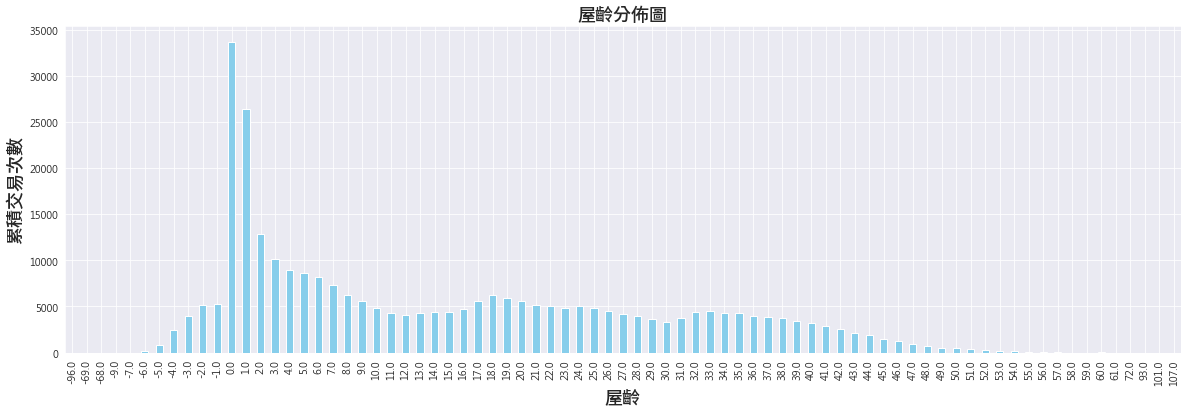

In [12]:
# (4)更新欄位: 屋齡
'''
根據屋齡以查看超過 60 年或低於 0 年是否為異常值，以了解房屋是否真為老屋或預售屋，又或者是年份有誤導致其異常值。
'''
# 建立年份 Dataframe
a = df_realEstate['交易年份']
b = df_realEstate['建築完成年份']
c = df_realEstate['交易年月日']
d = df_realEstate['建築完成年月']

df_year = pd.concat([a,b,c,d], axis=1)
df_year = pd.DataFrame(df_year, columns=['交易年份', '建築完成年份','交易年月日','建築完成年月'])
df_year['屋齡'] = df_year['交易年份'] - df_year['建築完成年份']
print('屋齡:\n',df_year['屋齡'].unique())

# 繪圖以便觀察異常值
plt.figure(figsize=(20, 6))
df_year['屋齡'].value_counts().sort_index().plot(kind = 'bar', color = 'skyblue')
plt.xlabel('屋齡', fontproperties = font_prop)
plt.ylabel('累積交易次數', fontproperties = font_prop)
plt.title('屋齡分佈圖', fontproperties = font_prop)
plt.show()

In [13]:
# 確認年份是否有異常值
'''
屋齡為 0 ~ -10 年似乎為預售屋交易；屋齡小於-10 年為交易年月日有誤導致，應予以刪除。
屋齡為 60 ~ 100 年交易與建築完成日期應無誤；屋齡大於 100 年為建築完成年月有誤導致，應予以刪除。
'''
filtered_data = df_year[(df_year['屋齡'] > 60) | (df_year['屋齡'] < 0)]
sorted_data = filtered_data.sort_values(by = '屋齡', ascending = True)  # ascending = True表示升序，False表示降序
print(sorted_data)

# 新增屋齡欄位並刪除異常值
df_realEstate['屋齡'] = df_realEstate['交易年份'] - df_realEstate['建築完成年份']
df_realEstate = df_realEstate[(df_realEstate['屋齡'] > -10) & (df_realEstate['屋齡'] < 100)]
df_realEstate['屋齡'].unique()

        交易年份  建築完成年份    交易年月日   建築完成年月     屋齡
16583   1911  2007.0    00001  0960801  -96.0
22164   1911  1980.0    00001  0691023  -69.0
905     1911  1979.0    00001  0680731  -68.0
469350  2011  2020.0  1001117  1091007   -9.0
407275  2012  2019.0  1010421  1080528   -7.0
...      ...     ...      ...      ...    ...
410764  2021  1960.0  1100425  0491010   61.0
465828  2021  1949.0  1101017  0380201   72.0
420661  2021  1928.0  1100903  0170214   93.0
70567   2013  1912.0  1021115  0010609  101.0
237091  2018  1911.0  1070227  0000///  107.0

[18003 rows x 5 columns]


array([32., 33., 40.,  0., 38., 29.,  5., 36., 25.,  1., 15., 23.,  3.,
       35., 14., 27., 17.,  2., 20., 31., 39., 16., 12.,  7., 28., 21.,
        4., 18., 24., 19., 45., 37.,  8., -2., 34., 26., 42., 13.,  6.,
       -3., -1., 41., 22.,  9., 30., 10., 43., 44., 11., 50., 47., 49.,
       46., 52., -4., 51., 53., 48., 57., 55., -5., 54., -6., -7., 56.,
       60., 61., 58., 93., 72., -9., 59.])

In [14]:
# (5)更新欄位: 總樓層數

# 將欄位「總樓層數」的中文轉換成數字
df_realEstate['總樓層數'] = df_realEstate['總樓層數'].str.replace('層', '')
df_realEstate['總樓層數'] = df_realEstate['總樓層數'].astype(str)
layers = {
    '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,'十':10
}

def convert_to_num(layer):
    if layer == '000' or layer == 'nan':
        return None
    else:
        if len(layer[:-1]) == 2:
            num = layers.get(layer[0]) * 10 + layers.get(layer[-1])
            return num
        elif len(layer[:-1]) == 1:
            num = 10 + layers.get(layer[-1])
            return num
        else:
            num = layers.get(layer)
            return num
            
df_realEstate['總樓層數'] = df_realEstate['總樓層數'].apply(convert_to_num)
df_realEstate['總樓層數'].head()

0    5.0
1    5.0
2    4.0
3    6.0
4    4.0
Name: 總樓層數, dtype: float64

In [15]:
# (6)更新欄位: 移轉層次
'''
交易的層數不單只有一層，較為複雜。考慮分成多個欄位。
'''

# 查看欄位「移轉層次」
[i for i  in df_realEstate['移轉層次'].unique()]

['三層',
 '一層',
 '二層',
 '五層',
 '四層',
 '六層',
 '一層，平台',
 '十層',
 '七層',
 '十二層',
 '八層',
 '十層，十一層，屋頂突出物',
 '十三層',
 '七層，電梯樓梯間',
 '四層，陽台',
 '九層',
 '十一層',
 '十四層',
 '十五層',
 '十六層',
 '九層，陽台，電梯樓梯間',
 '一層，夾層',
 '一層，地下一層',
 '七層，陽台',
 '十層，十一層',
 '六層，電梯樓梯間',
 '四層，五層',
 '三層，陽台',
 '十七層',
 '十八層',
 '四層，電梯樓梯間',
 '十層，電梯樓梯間',
 '平台，一層',
 '二層，陽台',
 '十二層，十三層',
 '五層，夾層',
 '八層，陽台',
 '五層，陽台',
 '三層，電梯樓梯間',
 '地下層',
 '十一層，陽台',
 '九層，陽台',
 '二十層',
 '六層，陽台',
 '一層，騎樓',
 '一層，電梯樓梯間',
 '二層，三層',
 '三層，四層',
 '九層，十層',
 '二十一層',
 '十九層',
 '五層，電梯樓梯間',
 '八層，九層',
 '十三層，十四層',
 '二層，電梯樓梯間',
 '二十四層',
 '十層，九層',
 '一層，二層',
 '四層，五層，屋頂突出物，夾層',
 '六層，走廊',
 '電梯樓梯間，十層',
 '一層，二層，三層',
 '夾層，一層',
 '二十三層',
 '二層，通道',
 '十四層，十五層',
 '二層，一層',
 '十七層，屋頂突出物，夾層',
 '八層，電梯樓梯間',
 '陽台，三層',
 '二層，走廊',
 '一層，停車場',
 '三層，二層',
 '十九層，二十層',
 '四層，走廊',
 '地下二層',
 '七層，八層',
 '十三層，夾層',
 '五層，屋頂突出物',
 '六層，七層',
 '三層，四層，電梯樓梯間，夾層',
 '一層，平台，騎樓，停車場',
 '二十六層',
 '二十八層',
 '一層，走廊',
 '二十九層',
 '十七層，十八層',
 '九層，通道',
 '四十一層',
 '一層，二層，地下一層',
 '五層，六層',
 '二十三層，見其他登記事項',
 '三層，四層，五層',
 '二十二層',
 '一層，二層，陽

In [16]:
# 處理欄位「移轉層次」
'''
「移轉層次」為交易所移轉的層次，有一個或多個層數與其他可用位置。
將欄位拆分成「超高樓層」、「高樓層」、「中樓層」、「低樓層」、「地下樓層」、「其他位置」，其欄位的值為移轉的數量。
「超高樓層」為大於等於 16 層的數量。
「高樓層」為界於 11 到 15 層的數量。
「中樓層」為界於 5 到 10 層的數量。
「低樓層」為界於 1 到 5 的數量。
「地下樓層」為小於 0 層的數量。
「其他位置」為電梯樓梯間、夾層、屋頂突出物等非主要地方的數量。
'''
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].astype(str)
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].dropna()

# 分開資料中的字串
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].str.split('，') 

# 刪除不必要的資訊(見其他登記事項...)。夾層改成夾間較易做後續的分類。
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].apply(lambda items: [item.replace('夾層', '夾間') for item in items if '見' not in item])

# 新增欄位並分類以及計算數量
df_realEstate['其他位置'] = df_realEstate['移轉層次'].apply(lambda items: [item for item in items if '層' not in item])
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].apply(lambda items: [item for item in items if '層' in item])
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].apply(lambda items: [item.replace('層', '') for item in items])
df_realEstate['地下樓層'] = df_realEstate['移轉層次'].apply(lambda items: [item for item in items if '地下' in item])
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].apply(lambda items: [item for item in items if '地下' not in item])

# 將層數轉為數字以便做分類
df_realEstate['移轉層次'] = df_realEstate['移轉層次'].apply(lambda items: [convert_to_num(item) for item in items])
df_realEstate['其他位置'] = df_realEstate['其他位置'].apply(lambda items: len(items))
df_realEstate['地下樓層'] = df_realEstate['地下樓層'].apply(lambda items: len(items))
df_realEstate['低樓層'] = df_realEstate['移轉層次'].apply(lambda items: sum(1 for item in items if 1 <= item <= 5))
df_realEstate['中樓層'] = df_realEstate['移轉層次'].apply(lambda items: sum(1 for item in items if 6 <= item <= 10))
df_realEstate['高樓層'] = df_realEstate['移轉層次'].apply(lambda items: sum(1 for item in items if 11 <= item <= 15))
df_realEstate['超高樓層'] = df_realEstate['移轉層次'].apply(lambda items: sum(1 for item in items if 16 <= item))

# 刪除欄位
#df_realEstate = df_realEstate.drop(columns=['移轉層次'])

df_realEstate

,交易年月日,建物型態,建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物現況格局-隔間,建築完成年月,有無管理組織,移轉層次,縣市,總價元,總樓層數,車位總價元,車位類別,鄉鎮市區,電梯,主建物面積坪,土地移轉總面積坪,建物移轉總面積坪,車位移轉總面積坪,附屬建物面積坪,陽台面積坪,交易年份,建築完成年份,屋齡,其他位置,地下樓層,低樓層,中樓層,高樓層,超高樓層
0,1010710,公寓(5樓含以下無電梯),1,3,1,有,0691114,無,[3],台北市,14000000.0,5.0,0.0,NaN,內湖區,NaN,27.122151,9.804025,31.493276,0.000000,0.000000,4.371125,2012,1980.0,32.0,0,0,1,0,0,0
1,1010720,公寓(5樓含以下無電梯),1,2,1,有,0680828,無,[1],台北市,19000000.0,5.0,0.0,NaN,士林區,NaN,28.722376,9.438000,31.774601,0.000000,3.052225,0.000000,2012,1979.0,33.0,0,0,1,0,0,0
2,1010717,公寓(5樓含以下無電梯),2,3,2,有,0610830,無,[2],台北市,28000000.0,4.0,0.0,NaN,大安區,NaN,35.338051,14.520001,39.439951,0.000000,0.000000,4.101900,2012,1972.0,40.0,0,0,1,0,0,0
3,1010217,華廈(10層含以下有電梯),2,2,1,有,1010301,無,[5],台北市,21500000.0,6.0,0.0,NaN,士林區,NaN,18.497876,9.707225,36.363526,0.000000,0.520300,4.507250,2012,2012.0,0.0,0,0,1,0,0,0
4,1010622,公寓(5樓含以下無電梯),2,3,2,有,0630905,無,[2],台北市,12100000.0,4.0,0.0,NaN,北投區,NaN,0.000000,9.528750,28.132501,0.000000,0.000000,0.000000,2012,1974.0,38.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551242,1081224,住宅大樓(11層含以上有電梯),2,3,2,有,1120330,有,[2],新北市,19960000.0,11.0,2200000.0,坡道平面,三重區,有,20.694026,8.975175,49.489002,12.100000,1.636525,2.344375,2019,2023.0,-4.0,0,0,1,0,0,0
551285,1081125,住宅大樓(11層含以上有電梯),1,1,1,有,1101013,有,[11],新北市,10780000.0,15.0,1000000.0,升降機械,中和區,有,8.267325,2.338325,20.908801,2.752750,0.000000,2.819300,2019,2021.0,-2.0,0,0,0,0,1,0
551463,1080305,住宅大樓(11層含以上有電梯),1,2,1,有,1120418,有,[4],新北市,8800000.0,13.0,1000000.0,塔式車位,汐止區,有,14.032976,4.483050,27.863276,3.028025,0.931700,1.388475,2019,2023.0,-4.0,0,0,1,0,0,0
551464,1071119,住宅大樓(11層含以上有電梯),1,3,2,有,1101013,有,[11],新北市,19930000.0,15.0,3600000.0,升降平面,中和區,有,15.911501,5.236275,43.605377,13.784926,0.541475,1.966250,2018,2021.0,-3.0,0,0,0,0,1,0


In [17]:
print(df_realEstate.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299834 entries, 0 to 551465
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   交易年月日      299834 non-null  object 
 1   建物型態       299834 non-null  object 
 2   建物現況格局-廳   299834 non-null  int32  
 3   建物現況格局-房   299834 non-null  int32  
 4   建物現況格局-衛   299834 non-null  int32  
 5   建物現況格局-隔間  299834 non-null  object 
 6   建築完成年月     299834 non-null  object 
 7   有無管理組織     299834 non-null  object 
 8   移轉層次       299834 non-null  object 
 9   縣市         299834 non-null  object 
 10  總價元        299834 non-null  float64
 11  總樓層數       299756 non-null  float64
 12  車位總價元      299834 non-null  float64
 13  車位類別       158808 non-null  object 
 14  鄉鎮市區       299834 non-null  object 
 15  電梯         79995 non-null   object 
 16  主建物面積坪     299834 non-null  float64
 17  土地移轉總面積坪   299834 non-null  float64
 18  建物移轉總面積坪   299834 non-null  float64
 19  車位移轉總面積坪   299834 non-n

In [18]:
# (7)更新欄位: 電梯

#根據建物型態填充空值
df_realEstate['電梯'] = df_realEstate.apply(lambda row: '無' if pd.isna(row['電梯']) and row['建物型態'] == '公寓(5樓含以下無電梯)' else '有', axis=1)

# 欄位「電梯」改成 dummy 變數
df_realEstate['電梯'] = df_realEstate['電梯'].replace('有', 1)
df_realEstate['電梯'] = df_realEstate['電梯'].replace('無', 0)

# 檢查是否還存在空值
new_df = pd.concat([df_realEstate['電梯'], df_realEstate['建物型態']], axis=1)
new_df[df_realEstate['電梯'].isna()]


,電梯,建物型態


In [19]:
# (8)更新欄位: 有無管理組織

# 欄位「有無管理組織」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['有無管理組織'], 
                               prefix = '有無管理組織', # 新建虛擬變數的名稱前綴
                               dummy_na = False,       # 如果設為 True，則會為缺失值（NaN）創建一個虛擬變數列
                               drop_first = False)    # 如果設為 True，會刪除每個虛擬變數的第一個類別值
df_realEstate['有無管理組織_有']

# 以「有無管理組織_無」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(columns=['有無管理組織_無'])


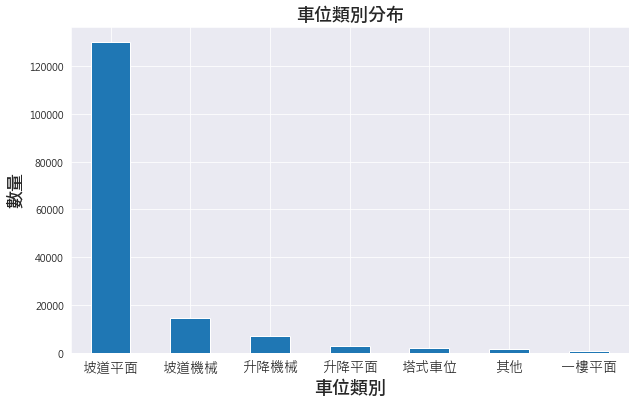

In [20]:
# (9)更新欄位: 車位類別

# 計算欄位「車位類別」列中每個類別的數量
car_park_counts = df_realEstate['車位類別'].value_counts()

# 繪圖以觀察車位類別分布
plt.figure(figsize=(10, 6))
car_park_counts.plot(kind='bar')
plt.title('車位類別分布', fontproperties = font_prop)
plt.xlabel('車位類別', fontproperties = font_prop)
plt.ylabel('數量', fontproperties = font_prop)
plt.xticks(rotation = 0,fontsize = 14)
plt.show()


In [21]:
# 將空值填充成「無」表示無車位
df_realEstate['車位類別'] = df_realEstate['車位類別'].fillna('無')

# 檢查空值
df_realEstate['車位類別'][df_realEstate['車位類別'].isna()]

#欄位「車位類別」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['車位類別'], 
                               prefix = '車位類別', # 新建虛擬變數的名稱前綴
                               dummy_na = False,       # 如果設為 True，則會為缺失值（NaN）創建一個虛擬變數列
                               drop_first = False)    # 如果設為 True，會刪除每個虛擬變數的第一個類別值

# 以「車位類別_無」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(columns=['車位類別_無'])


In [22]:
# (10)更新欄位: 建物現況格局-隔間

#欄位「建物現況格局-隔間」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['建物現況格局-隔間'])

# 以「建物現況格局-隔間_無」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(['建物現況格局-隔間_無'],axis = 1)

# (11)更新欄位: 鄉鎮市區

#欄位「鄉鎮市區」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['鄉鎮市區'], 
                               prefix = '鄉鎮市區', # 新建虛擬變數的名稱前綴
                               dummy_na = False,       # 如果設為 True，則會為缺失值（NaN）創建一個虛擬變數列
                               drop_first = False)    # 如果設為 True，會刪除每個虛擬變數的第一個類別值

# 以「鄉鎮市區_鶯歌區」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(['鄉鎮市區_鶯歌區'],axis = 1)

# (12)更新欄位: 縣市

#欄位「縣市」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['縣市'], 
                               prefix = '縣市', # 新建虛擬變數的名稱前綴
                               dummy_na = False,       # 如果設為 True，則會為缺失值（NaN）創建一個虛擬變數列
                               drop_first = False)    # 如果設為 True，會刪除每個虛擬變數的第一個類別值

# 以「縣市_新北市」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(['縣市_新北市'],axis = 1)

df_realEstate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299834 entries, 0 to 551465
Data columns (total 74 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   交易年月日        299834 non-null  object 
 1   建物型態         299834 non-null  object 
 2   建物現況格局-廳     299834 non-null  int32  
 3   建物現況格局-房     299834 non-null  int32  
 4   建物現況格局-衛     299834 non-null  int32  
 5   建築完成年月       299834 non-null  object 
 6   移轉層次         299834 non-null  object 
 7   總價元          299834 non-null  float64
 8   總樓層數         299756 non-null  float64
 9   車位總價元        299834 non-null  float64
 10  電梯           299834 non-null  int64  
 11  主建物面積坪       299834 non-null  float64
 12  土地移轉總面積坪     299834 non-null  float64
 13  建物移轉總面積坪     299834 non-null  float64
 14  車位移轉總面積坪     299834 non-null  float64
 15  附屬建物面積坪      299834 non-null  float64
 16  陽台面積坪        299834 non-null  float64
 17  交易年份         299834 non-null  int32  
 18  建築完成年份       299834 non-

In [23]:
## 2-4 處理空值 ##
'''
根據上表「總樓層數」有空值須做處理。
'''

# 觀察「總樓層數」與「移轉層次」的關係
df_new = pd.concat([df_realEstate['總樓層數'],df_realEstate['建物型態'],df_realEstate['移轉層次']], axis = 1)
df_new[(df_realEstate['總樓層數'].isna())]

,總樓層數,建物型態,移轉層次
3833,NaN,公寓(5樓含以下無電梯),[2]
7514,NaN,公寓(5樓含以下無電梯),[3]
9768,NaN,華廈(10層含以下有電梯),[8]
14829,NaN,公寓(5樓含以下無電梯),[3]
20027,NaN,住宅大樓(11層含以上有電梯),[8]
...,...,...,...
420661,NaN,公寓(5樓含以下無電梯),[1]
491488,NaN,華廈(10層含以下有電梯),[9]
510745,NaN,華廈(10層含以下有電梯),[4]
528688,NaN,公寓(5樓含以下無電梯),[1]


In [24]:
# 觀察「住宅大樓」、「華廈」、「公寓」的眾數與「移轉層次」的關係
'''
「住宅大樓」與「公寓」的眾數皆高於其對應的「移轉層次」，故以其填充空值。
「華廈」的眾數則低於其對應的「移轉層次」，故以 10 為基準填充空值。
'''
layers_mode1 = df_new[df_new['建物型態'] == '住宅大樓(11層含以上有電梯)']['總樓層數'].mode()[0]
layers_mode2 = df_new[df_new['建物型態'] == '華廈(10層含以下有電梯)']['總樓層數'].mode()[0]
layers_mode3 = df_new[df_new['建物型態'] == '公寓(5樓含以下無電梯)']['總樓層數'].mode()[0]

print('住宅大樓(11層含以上有電梯):',layers_mode1,'\n華廈(10層含以下有電梯):',layers_mode2,'\n公寓(5樓含以下無電梯):',layers_mode3)

# 依「建物型態」填充「總樓層數」的空值
for i in range(len(df_realEstate)):
    if pd.isna(df_realEstate['總樓層數'].iloc[i]):
        if df_realEstate['建物型態'].iloc[i] == '住宅大樓(11層含以上有電梯)':
            df_realEstate['總樓層數'].iloc[i] = 15
        elif df_realEstate['建物型態'].iloc[i] == '華廈(10層含以下有電梯)':
            df_realEstate['總樓層數'].iloc[i] = 10
        else:
            df_realEstate['總樓層數'].iloc[i] = 5
            

住宅大樓(11層含以上有電梯): 15.0 
華廈(10層含以下有電梯): 7.0 
公寓(5樓含以下無電梯): 5.0


In [25]:
# 觀察「單價元坪」與其他欄位的關係
'''
「單價元坪」與「建物移轉總面積坪」相乘多數大致等於「總價元」，故以其填充空值。

df_new = pd.concat([df_realEstate['單價元坪'], df_realEstate['總價元'], 
                    df_realEstate['建物移轉總面積坪'], df_realEstate['土地移轉總面積坪']],axis = 1)
df_new['單價元坪*建物移轉總面積坪'] = df_new['單價元坪'] * df_new['建物移轉總面積坪']

# 依「總價元」與「建物移轉總面積坪」相乘填充「單價元坪」的空值
df_realEstate['單價元坪'] = df_realEstate['單價元坪'].fillna(df_realEstate['總價元']/df_realEstate['建物移轉總面積坪'])
df_new
'''

"\n「單價元坪」與「建物移轉總面積坪」相乘多數大致等於「總價元」，故以其填充空值。\n\ndf_new = pd.concat([df_realEstate['單價元坪'], df_realEstate['總價元'], \n                    df_realEstate['建物移轉總面積坪'], df_realEstate['土地移轉總面積坪']],axis = 1)\ndf_new['單價元坪*建物移轉總面積坪'] = df_new['單價元坪'] * df_new['建物移轉總面積坪']\n\n# 依「總價元」與「建物移轉總面積坪」相乘填充「單價元坪」的空值\ndf_realEstate['單價元坪'] = df_realEstate['單價元坪'].fillna(df_realEstate['總價元']/df_realEstate['建物移轉總面積坪'])\ndf_new\n"

In [26]:
# (13)更新欄位: 建物型態

# 更改欄位名稱
df_realEstate['建物型態'] = df_realEstate['建物型態'].str.split('(').str[0]

#欄位「建物型態」改成 dummy 變數
df_realEstate = pd.get_dummies(df_realEstate, columns = ['建物型態'], 
                               prefix = '建物型態', # 新建虛擬變數的名稱前綴
                               dummy_na = False,       # 如果設為 True，則會為缺失值（NaN）創建一個虛擬變數列
                               drop_first = False)    # 如果設為 True，會刪除每個虛擬變數的第一個類別值

# 以「建物型態_公寓」作為基準點，並刪除此欄位
df_realEstate = df_realEstate.drop(['建物型態_公寓'],axis = 1)

In [27]:
# 刪除不必要之欄位並確認欄位資訊
'''
樣本數為 299,834 筆，變數(欄位)有 72 個。無空值。
'''

df_realEstate = df_realEstate.drop(columns = ['交易年月日',
                                              '建築完成年月',
                                              '移轉層次'])
df_realEstate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299834 entries, 0 to 551465
Data columns (total 72 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   建物現況格局-廳     299834 non-null  int32  
 1   建物現況格局-房     299834 non-null  int32  
 2   建物現況格局-衛     299834 non-null  int32  
 3   總價元          299834 non-null  float64
 4   總樓層數         299834 non-null  float64
 5   車位總價元        299834 non-null  float64
 6   電梯           299834 non-null  int64  
 7   主建物面積坪       299834 non-null  float64
 8   土地移轉總面積坪     299834 non-null  float64
 9   建物移轉總面積坪     299834 non-null  float64
 10  車位移轉總面積坪     299834 non-null  float64
 11  附屬建物面積坪      299834 non-null  float64
 12  陽台面積坪        299834 non-null  float64
 13  交易年份         299834 non-null  int32  
 14  建築完成年份       299834 non-null  float64
 15  屋齡           299834 non-null  float64
 16  其他位置         299834 non-null  int64  
 17  地下樓層         299834 non-null  int64  
 18  低樓層          299834 non-

In [33]:
## 2-5相關係數 ##
'''
欄位「總價元」為我們的目標變數，查看「總價元」與其他變數的相關性如何。
'''
pd.set_option('display.max_columns', None) # 顯示所有欄位
df_realEstate.corr()

,建物現況格局-廳,建物現況格局-房,建物現況格局-衛,總價元,總樓層數,車位總價元,電梯,主建物面積坪,土地移轉總面積坪,建物移轉總面積坪,車位移轉總面積坪,附屬建物面積坪,陽台面積坪,交易年份,建築完成年份,屋齡,其他位置,地下樓層,低樓層,中樓層,高樓層,超高樓層,有無管理組織_有,車位類別_一樓平面,車位類別_其他,車位類別_升降平面,車位類別_升降機械,車位類別_坡道平面,車位類別_坡道機械,車位類別_塔式車位,建物現況格局-隔間_有,鄉鎮市區_三峽區,鄉鎮市區_三芝區,鄉鎮市區_三重區,鄉鎮市區_中和區,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_五股區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_八里區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_土城區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_新店區,鄉鎮市區_新莊區,鄉鎮市區_松山區,鄉鎮市區_板橋區,鄉鎮市區_林口區,鄉鎮市區_樹林區,鄉鎮市區_永和區,鄉鎮市區_汐止區,鄉鎮市區_泰山區,鄉鎮市區_淡水區,鄉鎮市區_深坑區,鄉鎮市區_烏來區,鄉鎮市區_瑞芳區,鄉鎮市區_石碇區,鄉鎮市區_石門區,鄉鎮市區_萬華區,鄉鎮市區_萬里區,鄉鎮市區_蘆洲區,鄉鎮市區_貢寮區,鄉鎮市區_金山區,鄉鎮市區_雙溪區,縣市_台北市,建物型態_住宅大樓,建物型態_華廈
建物現況格局-廳,1.000000,0.569292,0.421550,0.066650,0.019407,0.010186,0.003614,0.294769,0.210536,0.269814,0.053410,0.088261,0.233384,-0.011871,0.033223,-0.036265,-0.028065,0.013105,-0.002285,0.003029,0.017865,0.007237,0.034505,0.009951,-0.027773,0.011845,-0.036341,0.192922,0.009937,-0.023239,0.488128,0.013594,-0.062212,-0.025923,0.021323,-0.109893,-0.030879,0.014157,-0.026380,0.015467,-0.005329,-0.002399,0.009315,0.025537,-0.002005,-0.033442,-0.011368,0.012771,0.052114,0.001560,-0.009333,0.002606,0.051175,0.028032,0.017313,0.013947,0.010967,-0.035108,0.004156,-0.000077,0.001261,0.000811,-0.005890,-0.028543,-0.044999,0.033583,-0.000352,-0.013900,-0.005078,-0.072162,0.035424,-0.035688
建物現況格局-房,0.569292,1.000000,0.713904,0.121641,-0.079075,0.006048,-0.109646,0.476821,0.327844,0.380602,0.047836,0.118468,0.330925,-0.073936,-0.106659,0.089967,0.044599,0.019980,0.082896,-0.038035,-0.016869,-0.023932,-0.079283,0.014023,-0.035965,0.002101,-0.047729,0.167086,-0.032404,-0.046261,0.439724,0.014799,-0.051099,-0.008705,0.012211,-0.093996,-0.033508,0.004275,-0.021177,0.008686,-0.024634,-0.002104,0.008735,0.027950,0.008786,-0.029943,-0.011786,0.010907,0.033504,0.007559,-0.007250,0.007256,0.011164,0.033796,0.019838,-0.021373,0.020434,-0.004382,0.018761,-0.000850,0.009048,0.006527,-0.000491,-0.030791,-0.027754,0.050338,0.004711,-0.009499,0.000523,-0.064193,-0.068283,-0.037414
建物現況格局-衛,0.421550,0.713904,1.000000,0.214515,0.036428,0.104460,0.016146,0.475268,0.317707,0.447932,0.097646,0.153573,0.361879,-0.038857,0.030331,-0.039723,-0.033775,0.027315,0.004536,0.001086,0.015695,0.027249,0.036725,0.019099,-0.018923,0.003080,-0.030033,0.216860,-0.028682,-0.033483,0.363075,0.010027,-0.032115,-0.027061,-0.013103,-0.047465,-0.009539,-0.003055,-0.009345,0.024514,-0.008944,0.001116,0.009491,-0.001985,0.011649,-0.023941,0.011900,0.007770,0.018898,-0.011887,-0.000286,-0.009485,0.038192,0.021495,-0.004349,-0.026300,0.006032,0.035004,0.011161,0.001592,0.000994,0.004298,-0.004009,-0.034152,-0.035660,0.035030,0.005484,-0.010290,-0.000572,-0.016995,0.024429,-0.008891
總價元,0.066650,0.121641,0.214515,1.000000,0.220521,0.568265,0.142794,0.647967,0.382810,0.751528,0.265914,0.256789,0.512355,0.035514,0.196759,-0.189785,-0.064373,-0.000156,-0.122390,0.028960,0.055672,0.126703,0.111936,0.014008,0.022593,0.021326,0.020657,0.239817,-0.011307,0.018837,-0.200815,-0.046423,-0.058119,-0.024806,-0.030871,0.151581,0.107868,-0.044609,0.120447,0.097803,-0.047350,0.043469,0.075709,-0.043406,0.091883,0.029238,0.197483,0.032773,-0.017377,-0.038457,0.116738,0.004294,-0.027797,-0.039270,-0.007793,-0.077464,-0.031147,-0.128411,-0.017587,-0.002144,-0.025619,-0.005275,-0.008745,0.008824,-0.036926,-0.022567,-0.009685,-0.027453,-0.006464,0.352774,0.150815,-0.024605
總樓層數,0.019407,-0.079075,0.036428,0.220521,1.000000,0.268219,0.501633,0.097211,-0.202260,0.319315,0.198865,0.147937,0.189698,0.080506,0.586942,-0.572145,-0.259879,-0.039690,-0.535155,0.095732,0.248786,0.485480,0.505295,-0.030004,-0.006891,-0.032728,-0.056476,0.400471,0.074265,-0.023875,-0.035875,0.008067,-0.037718,-0.003342,-0.002830,-0.039887,-0.021546,-0.005610,-0.054320,-0.077304,0.041349,-0.089498,-0.009924,-0.004388,-0.087633,-0.021710,-0.025581,-0.039003,0.044001,-0.001072,-0.049401,0.050162,0.087267,0.001773,-0.032893,0.058204,-0.043782,0.166663,-0.030888,-0.004177,-0.043677,-0.006689,-0.016772,0.014215,-0.050012,-0.075669,-0.014558,-0.040028,-0.0113

<AxesSubplot:>

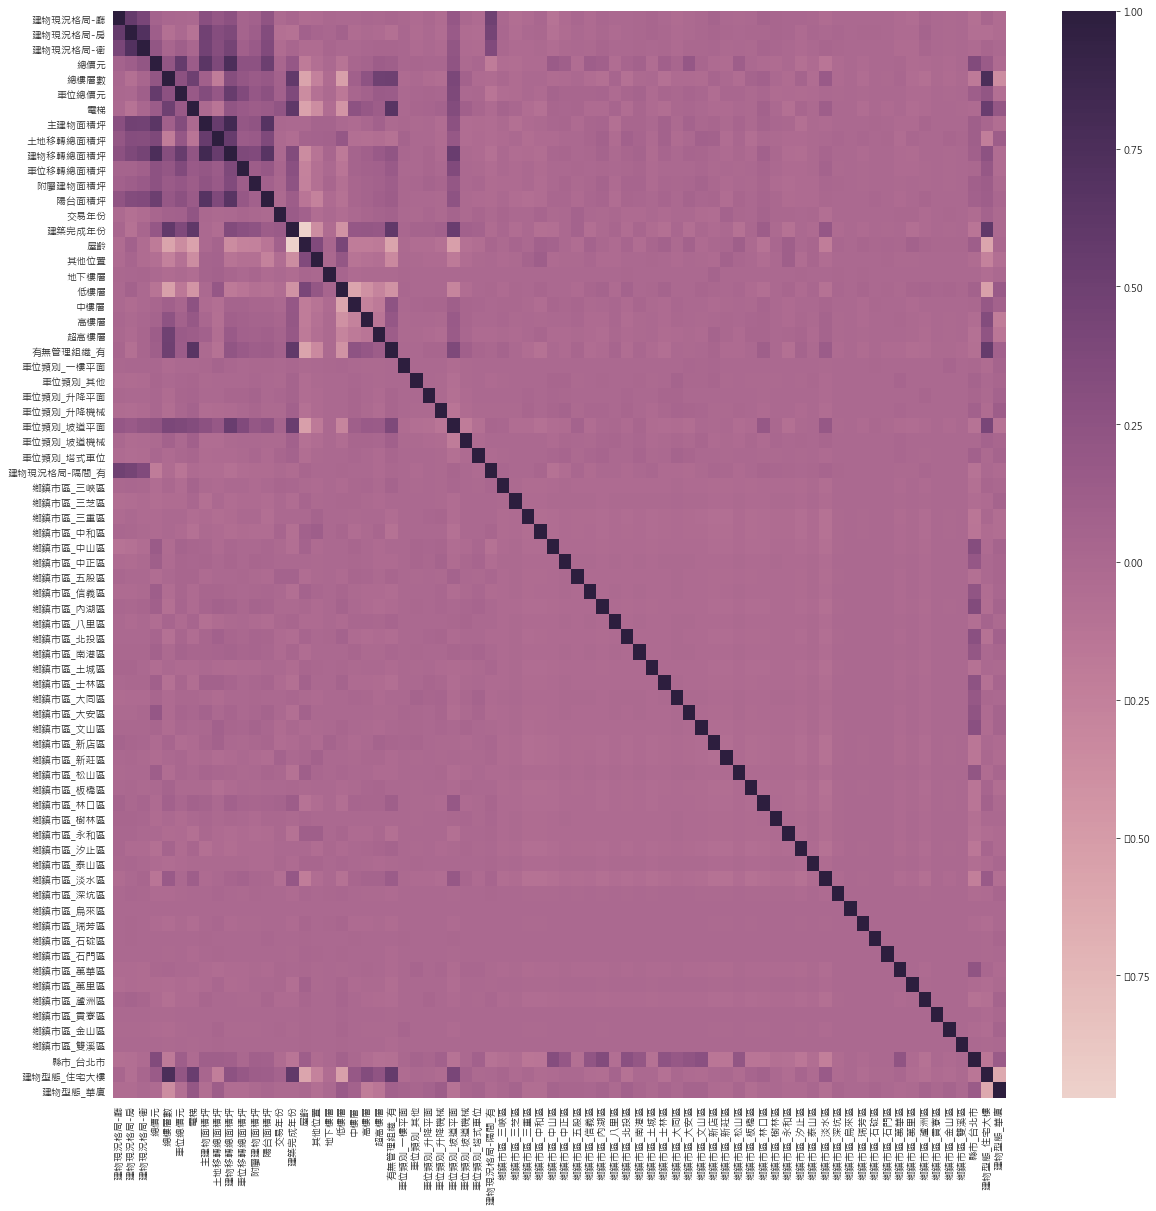

In [34]:
# 繪圖
'''
雖然在地區與「總價元」的相關性不高(顏色較淡)，但我認為地區與房價有著某種程度的關聯，有其一定參考性，故選擇保留。
'''
plt.subplots(figsize = (20, 20))  
sns.heatmap(df_realEstate.corr(), annot = False, vmax = 1, cmap = sns.cubehelix_palette(as_cmap=True))

In [28]:
### 3. 匯出檔案 ###
#df_realEstate.to_csv('realEstate.csv', index = False, sep = ',',encoding = 'big5')  